In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,4)
plt.rcParams['figure.dpi'] = 250
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

In [2]:
df = pd.read_csv("D:\ExcelR_Assignments\PCA\Dataset\wine.csv")
df

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0             0.28             2.29   5.64  1.04      3.92     1065  
1             0.26             1.28   4.38  1.05      3.40     1050  
2             0.30             2.81   5.68  1.03      3.17     1185  
3             0.24             2.18   7.80  0.86      3.45     1480  
4             0.39             1.82   4.32  1.04      2.93      735  
..             ...              ...    ...   ...       ...      ...  
173           0.52             1.06   7.70  0.64      1.74      740  
174           0.43             1.41   7.30  0.70      1.56      750  
175           0.43             1.35  10.20  0.59      1.56      835  
176           0.53             1.46   9.30  0.60      1.62      840  
177           0.56             1.35   9.20  0.61      1.60      560  

[178 rows x 14 columns]

In [3]:
df.describe().T

count        mean         std     min       25%      50%  \
Type             178.0    1.938202    0.775035    1.00    1.0000    2.000   
Alcohol          178.0   13.000618    0.811827   11.03   12.3625   13.050   
Malic            178.0    2.336348    1.117146    0.74    1.6025    1.865   
Ash              178.0    2.366517    0.274344    1.36    2.2100    2.360   
Alcalinity       178.0   19.494944    3.339564   10.60   17.2000   19.500   
Magnesium        178.0   99.741573   14.282484   70.00   88.0000   98.000   
Phenols          178.0    2.295112    0.625851    0.98    1.7425    2.355   
Flavanoids       178.0    2.029270    0.998859    0.34    1.2050    2.135   
Nonflavanoids    178.0    0.361854    0.124453    0.13    0.2700    0.340   
Proanthocyanins  178.0    1.590899    0.572359    0.41    1.2500    1.555   
Color            178.0    5.058090    2.318286    1.28    3.2200    4.690   
Hue              178.0    0.957449    0.228572    0.48    0.7825    0.965   
Dilution         178.0    2.611685    0.709990    1.27    1.9375    2.780   
Proline          178.0  746.893258  314.907474  278.00  500.5000  673.500   

                      75%      max  
Type               3.0000     3.00  
Alcohol           13.6775    14.83  
Malic              3.0825     5.80  
Ash                2.5575     3.23  
Alcalinity        21.5000    30.00  
Magnesium        107.0000   162.00  
Phenols            2.8000     3.88  
Flavanoids         2.8750     5.08  
Nonflavanoids      0.4375     0.66  
Proanthocyanins    1.9500     3.58  
Color              6.2000    13.00  
Hue                1.1200     1.71  
Dilution           3.1700     4.00  
Proline          985.0000  1680.00

In [4]:
# Understanding the relation between data

In [5]:
#sns.pairplot(data = df)

In [6]:
# Pairplot is not interpretable

In [7]:
df.corr()

Type   Alcohol     Malic       Ash  Alcalinity  \
Type             1.000000 -0.328222  0.437776 -0.049643    0.517859   
Alcohol         -0.328222  1.000000  0.094397  0.211545   -0.310235   
Malic            0.437776  0.094397  1.000000  0.164045    0.288500   
Ash             -0.049643  0.211545  0.164045  1.000000    0.443367   
Alcalinity       0.517859 -0.310235  0.288500  0.443367    1.000000   
Magnesium       -0.209179  0.270798 -0.054575  0.286587   -0.083333   
Phenols         -0.719163  0.289101 -0.335167  0.128980   -0.321113   
Flavanoids      -0.847498  0.236815 -0.411007  0.115077   -0.351370   
Nonflavanoids    0.489109 -0.155929  0.292977  0.186230    0.361922   
Proanthocyanins -0.499130  0.136698 -0.220746  0.009652   -0.197327   
Color            0.265668  0.546364  0.248985  0.258887    0.018732   
Hue             -0.617369 -0.071747 -0.561296 -0.074667   -0.273955   
Dilution        -0.788230  0.072343 -0.368710  0.003911   -0.276769   
Proline         -0.633717  0.643720 -0.192011  0.223626   -0.440597   

                 Magnesium   Phenols  Flavanoids  Nonflavanoids  \
Type             -0.209179 -0.719163   -0.847498       0.489109   
Alcohol           0.270798  0.289101    0.236815      -0.155929   
Malic            -0.054575 -0.335167   -0.411007       0.292977   
Ash               0.286587  0.128980    0.115077       0.186230   
Alcalinity       -0.083333 -0.321113   -0.351370       0.361922   
Magnesium         1.000000  0.214401    0.195784      -0.256294   
Phenols           0.214401  1.000000    0.864564      -0.449935   
Flavanoids        0.195784  0.864564    1.000000      -0.537900   
Nonflavanoids    -0.256294 -0.449935   -0.537900       1.000000   
Proanthocyanins   0.236441  0.612413    0.652692      -0.365845   
Color             0.199950 -0.055136   -0.172379       0.139057   
Hue               0.055398  0.433681    0.543479      -0.262640   
Dilution          0.066004  0.699949    0.787194      -0.503270   
Proline           0.393351  0.498115    0.494193      -0.311385   

                 Proanthocyanins     Color       Hue  Dilution   Proline  
Type                   -0.499130  0.265668 -0.617369 -0.788230 -0.633717  
Alcohol                 0.136698  0.546364 -0.071747  0.072343  0.643720  
Malic                  -0.220746  0.248985 -0.561296 -0.368710 -0.192011  
Ash                     0.009652  0.258887 -0.074667  0.003911  0.223626  
Alcalinity             -0.197327  0.018732 -0.273955 -0.276769 -0.440597  
Magnesium               0.236441  0.199950  0.055398  0.066004  0.393351  
Phenols                 0.612413 -0.055136  0.433681  0.699949  0.498115  
Flavanoids              0.652692 -0.172379  0.543479  0.787194  0.494193  
Nonflavanoids          -0.365845  0.139057 -0.262640 -0.503270 -0.311385  
Proanthocyanins         1.000000 -0.025250  0.295544  0.519067  0.330417  
Color                  -0.025250  1.000000 -0.521813 -0.428815  0.316100  
Hue                     0.295544 -0.521813  1.000000  0.565468  0.236183  
Dilution                0.519067 -0.428815  0.565468  1.000000  0.312761  
Proline                 0.330417  0.316100  0.236183  0.312761  1.000000

<Axes: >

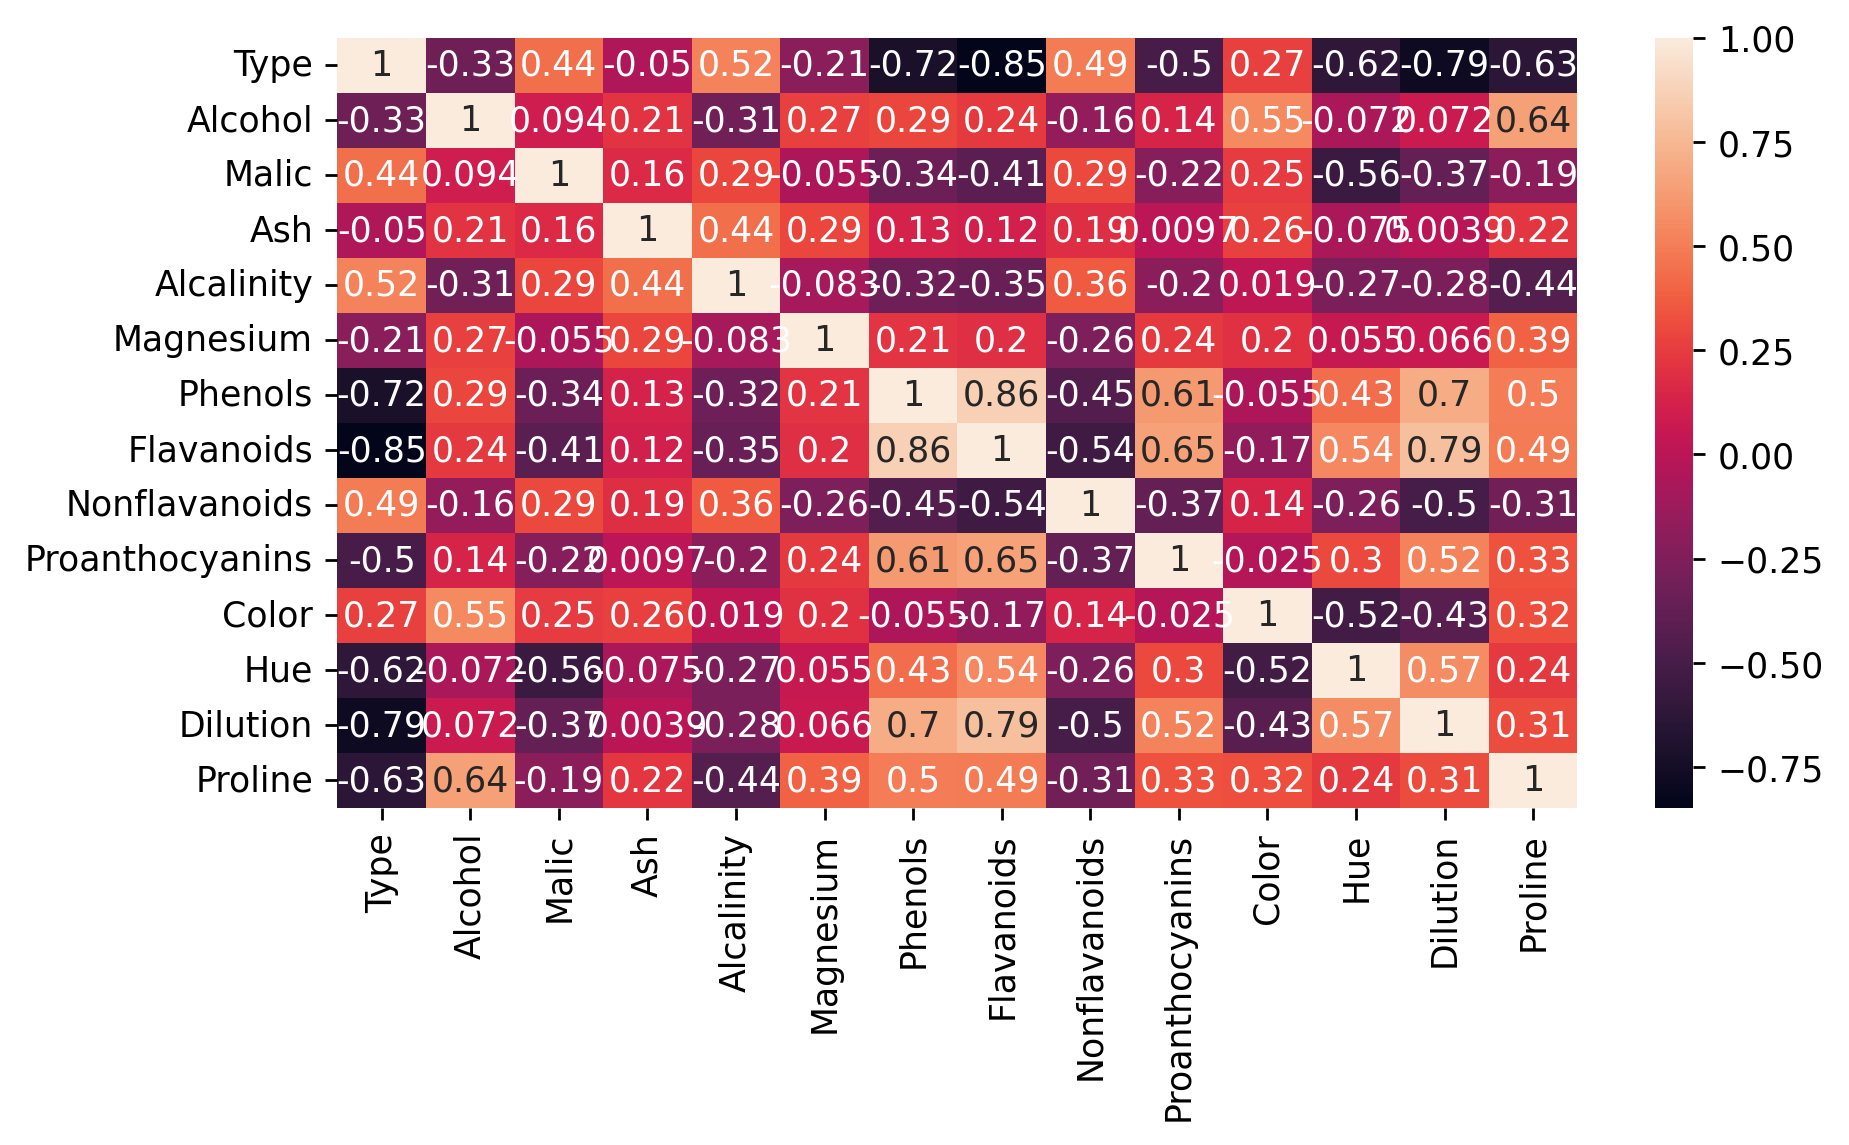

In [8]:
sns.heatmap(df.corr(), annot=True, cbar=True)

In [9]:
# Data Visualization

<Axes: xlabel='Alcohol', ylabel='Malic'>

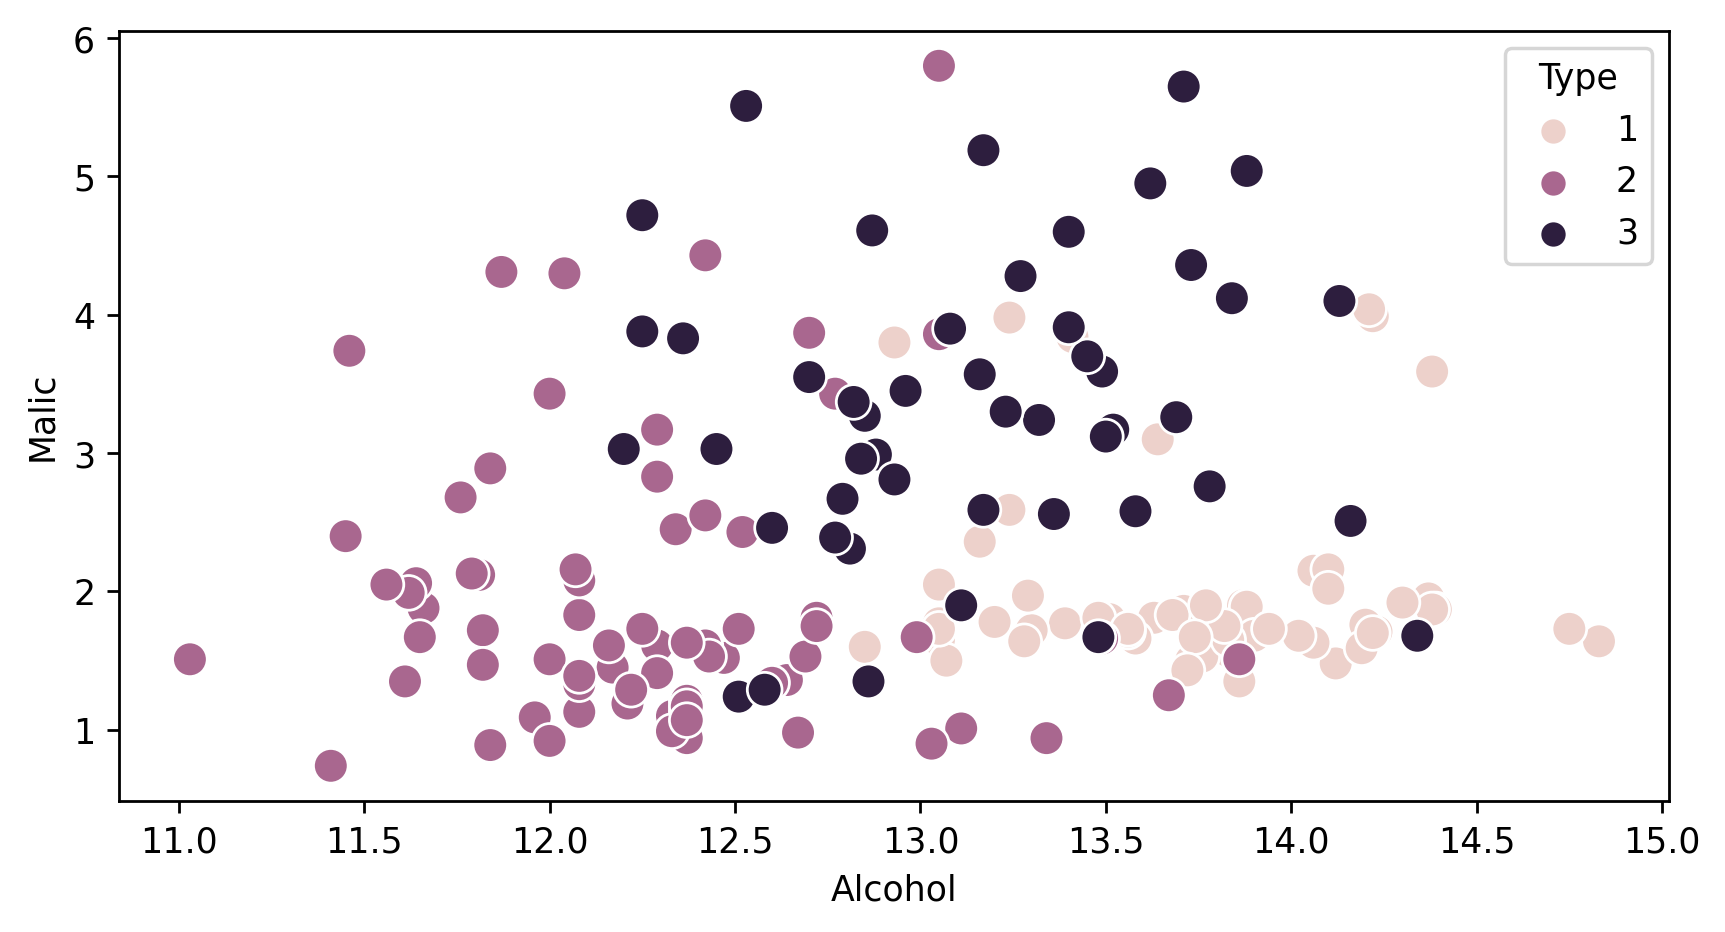

In [10]:
sns.scatterplot(x = df['Alcohol'], y = df['Malic'], hue = df['Type'], s = 100)

<Axes: xlabel='Ash', ylabel='Alcalinity'>

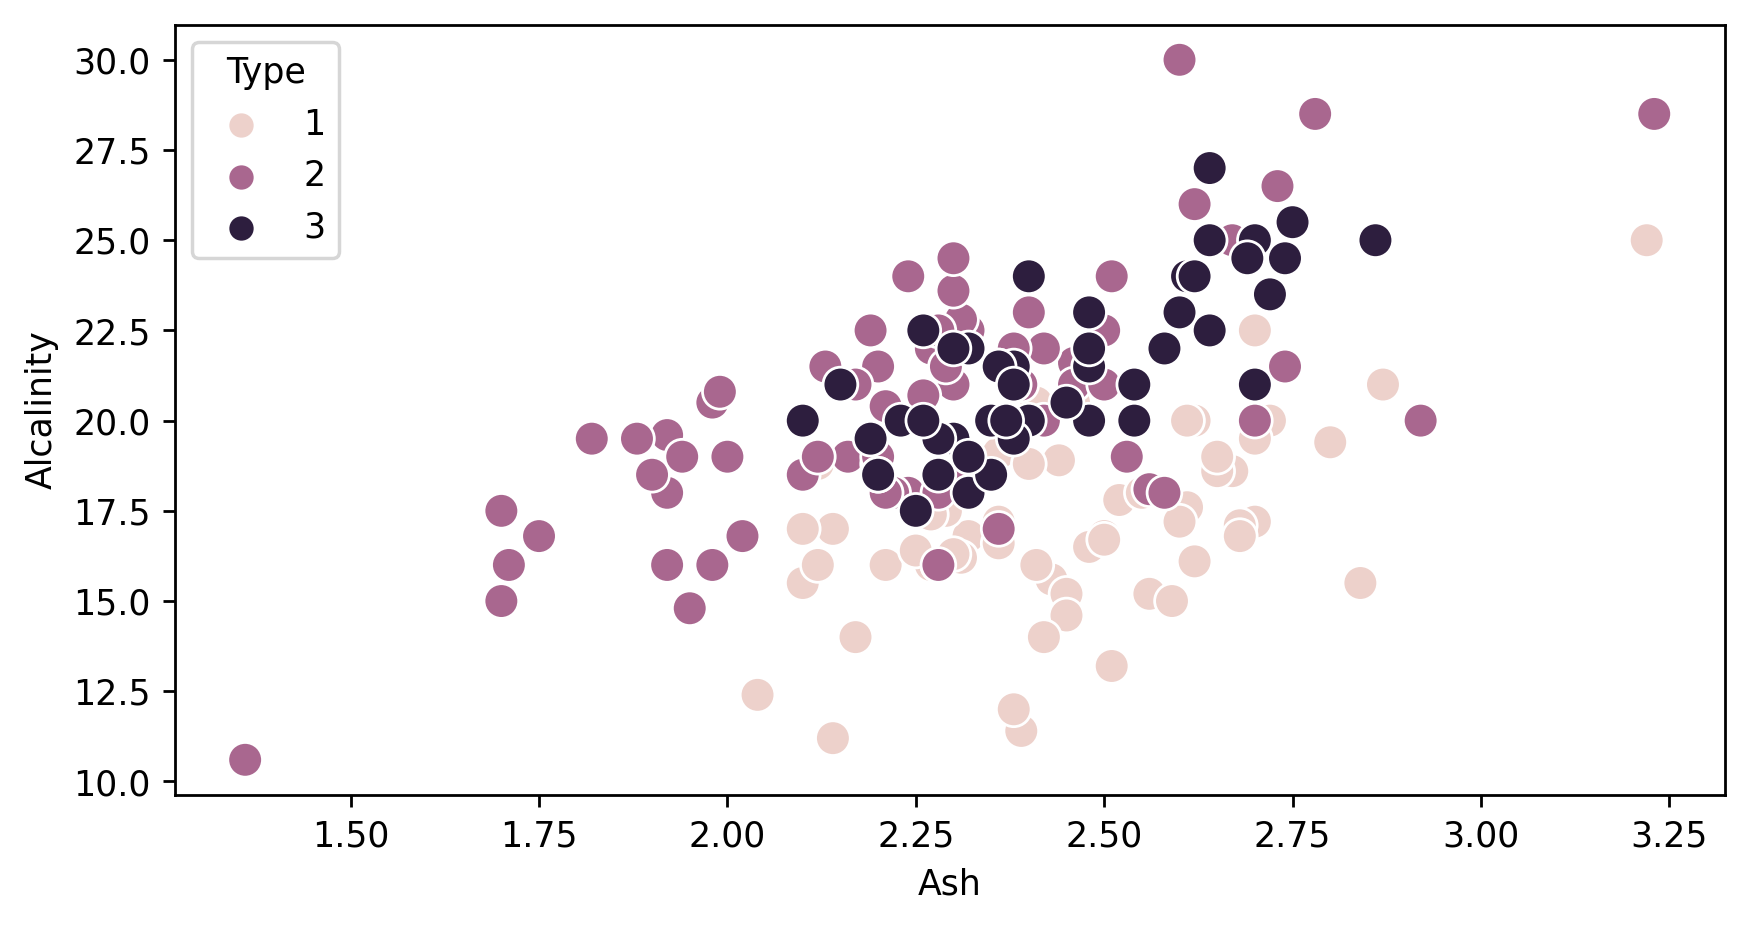

In [11]:
sns.scatterplot(x = df['Ash'], y = df['Alcalinity'], hue = df['Type'], s = 100)

<Axes: xlabel='Magnesium', ylabel='Phenols'>

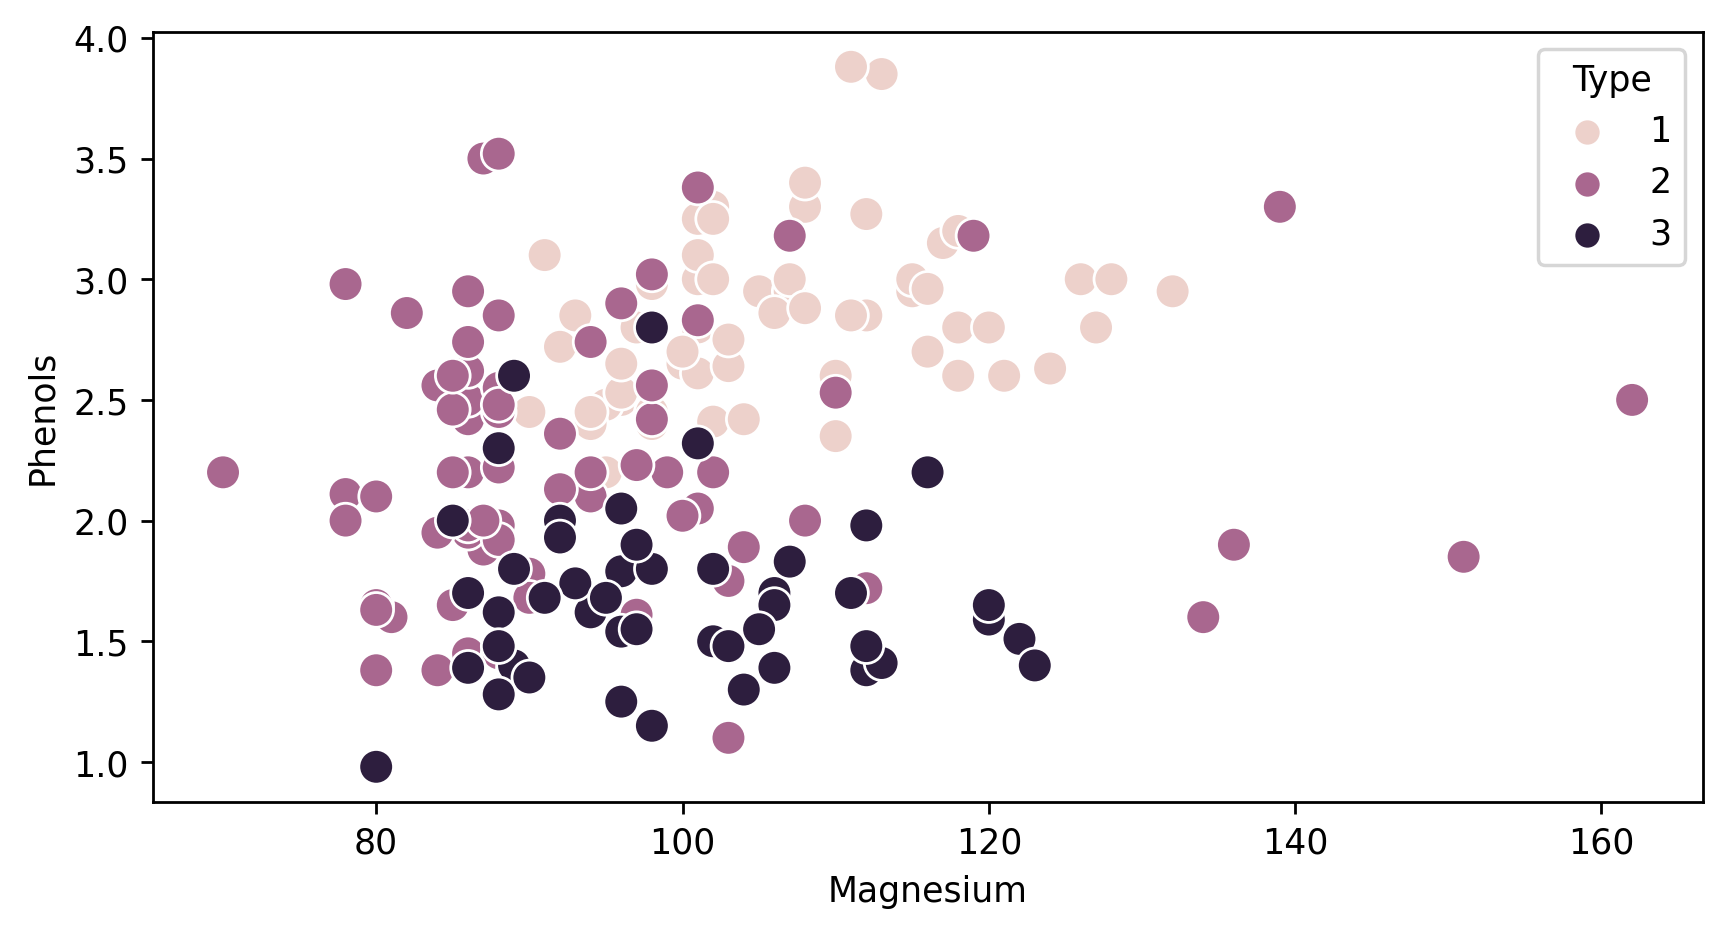

In [12]:
sns.scatterplot(x = df['Magnesium'], y = df['Phenols'], hue = df['Type'], s = 100)

<Axes: xlabel='Flavanoids', ylabel='Nonflavanoids'>

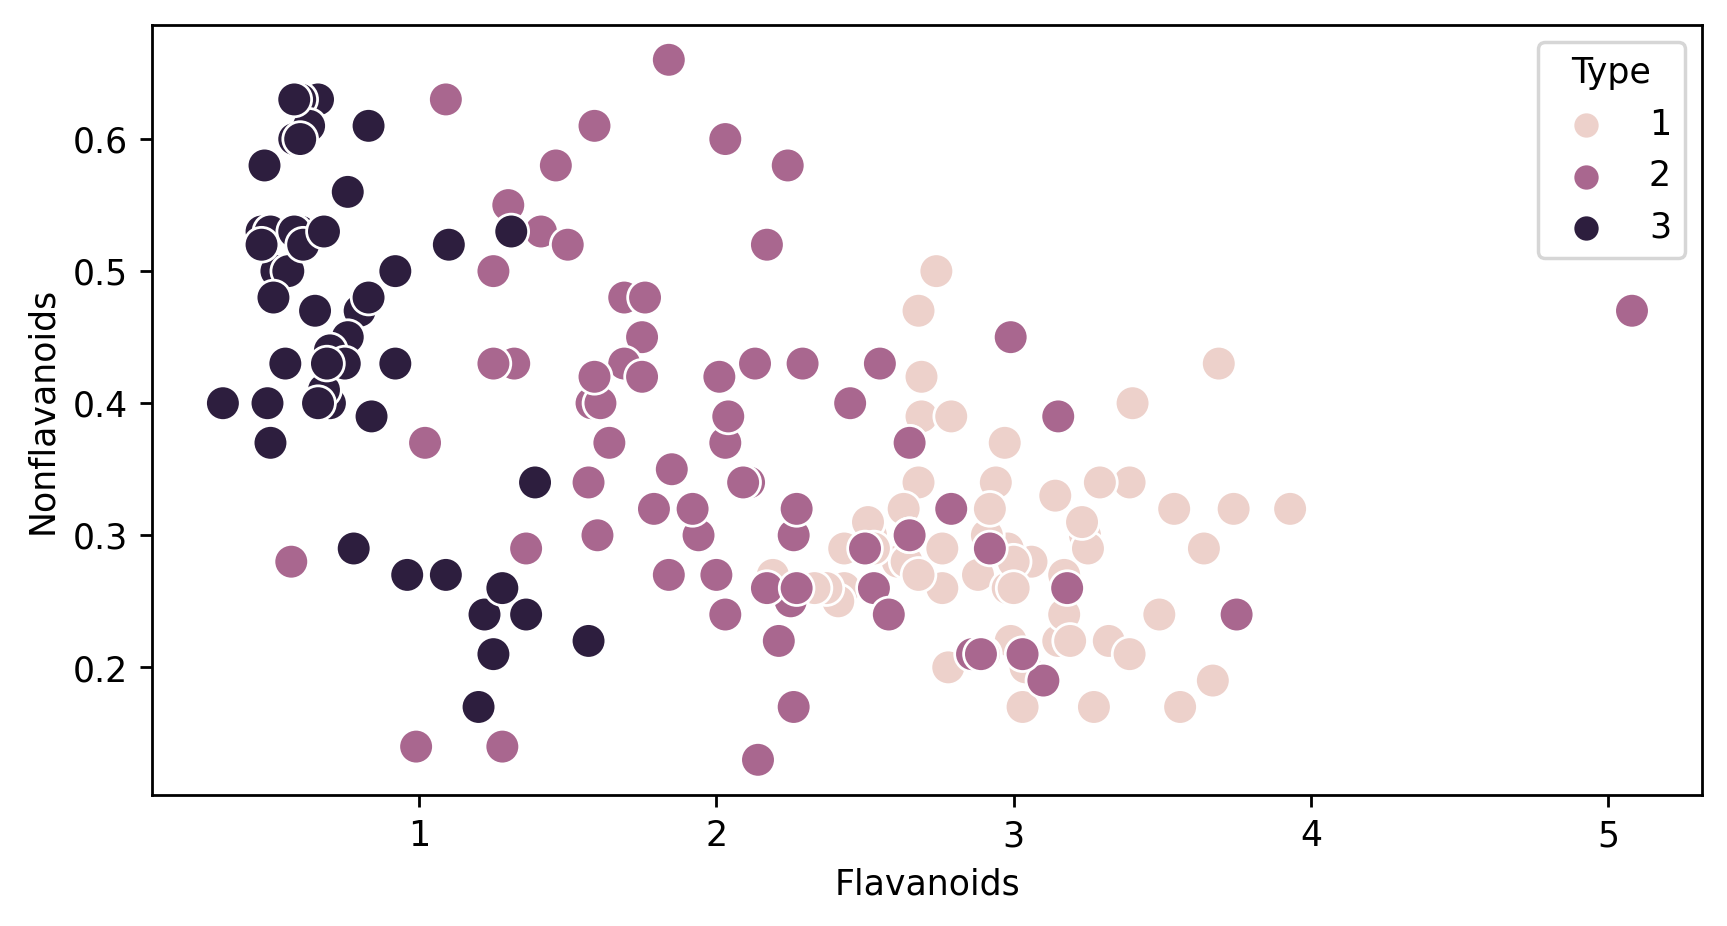

In [13]:
sns.scatterplot(x = df['Flavanoids'], y = df['Nonflavanoids'], hue = df['Type'], s = 100)

<Axes: xlabel='Color', ylabel='Hue'>

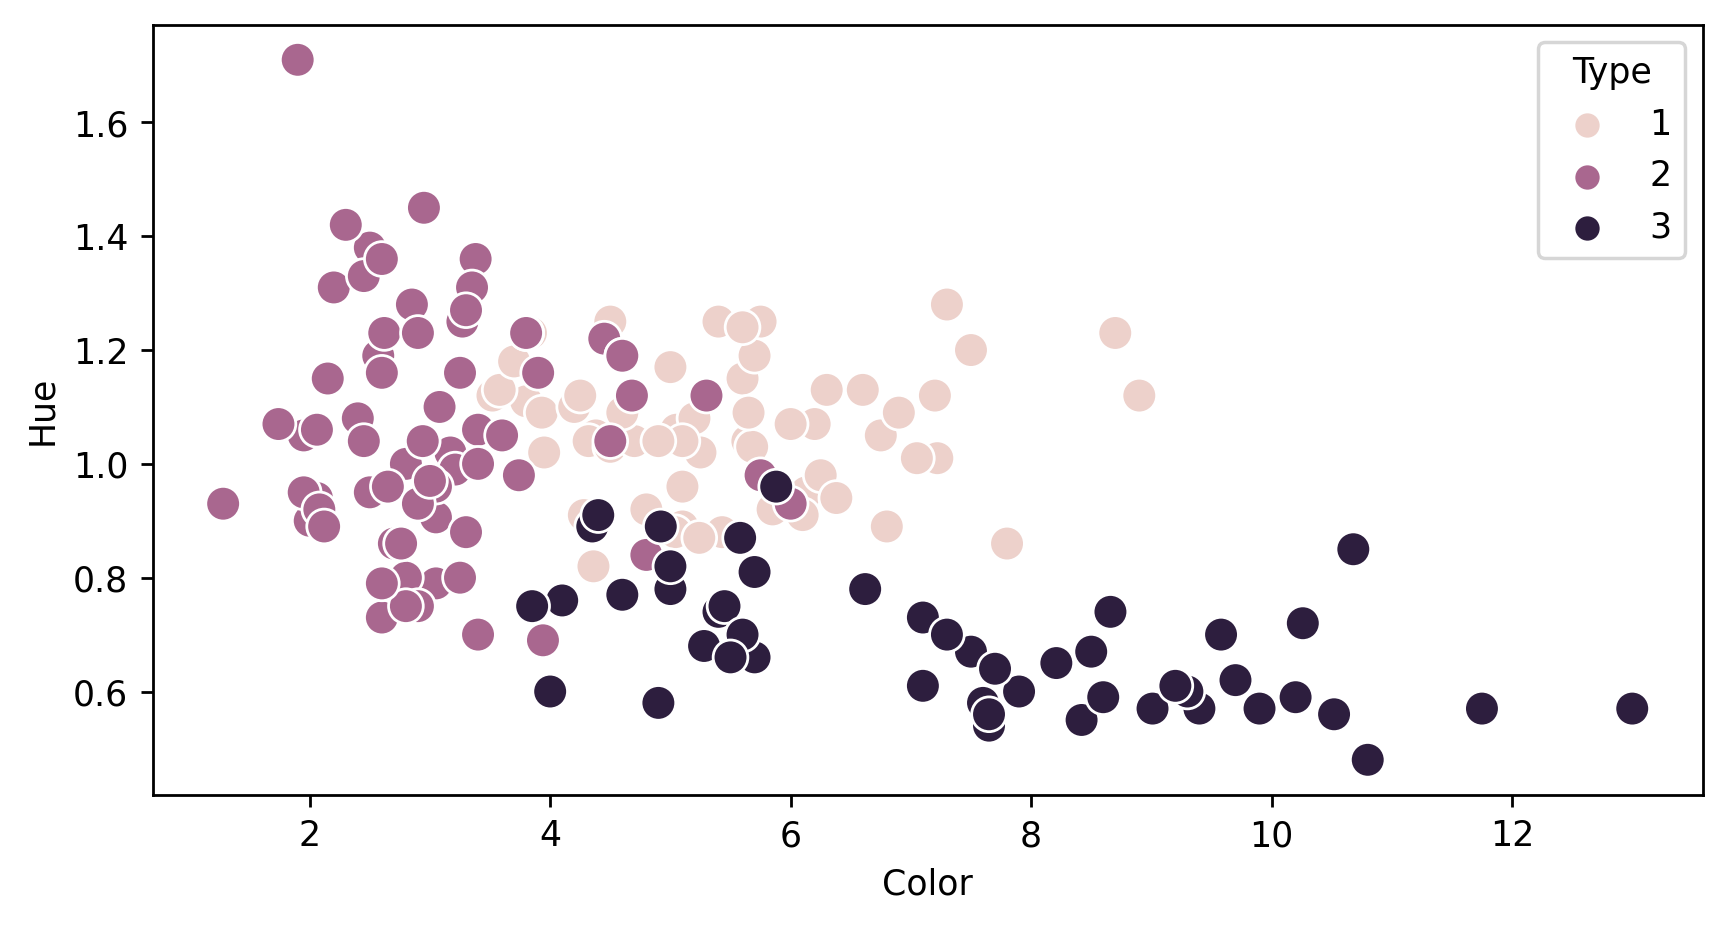

In [14]:
sns.scatterplot(x = df['Color'], y = df['Hue'], hue = df['Type'], s = 100)

<Axes: xlabel='Dilution', ylabel='Proline'>

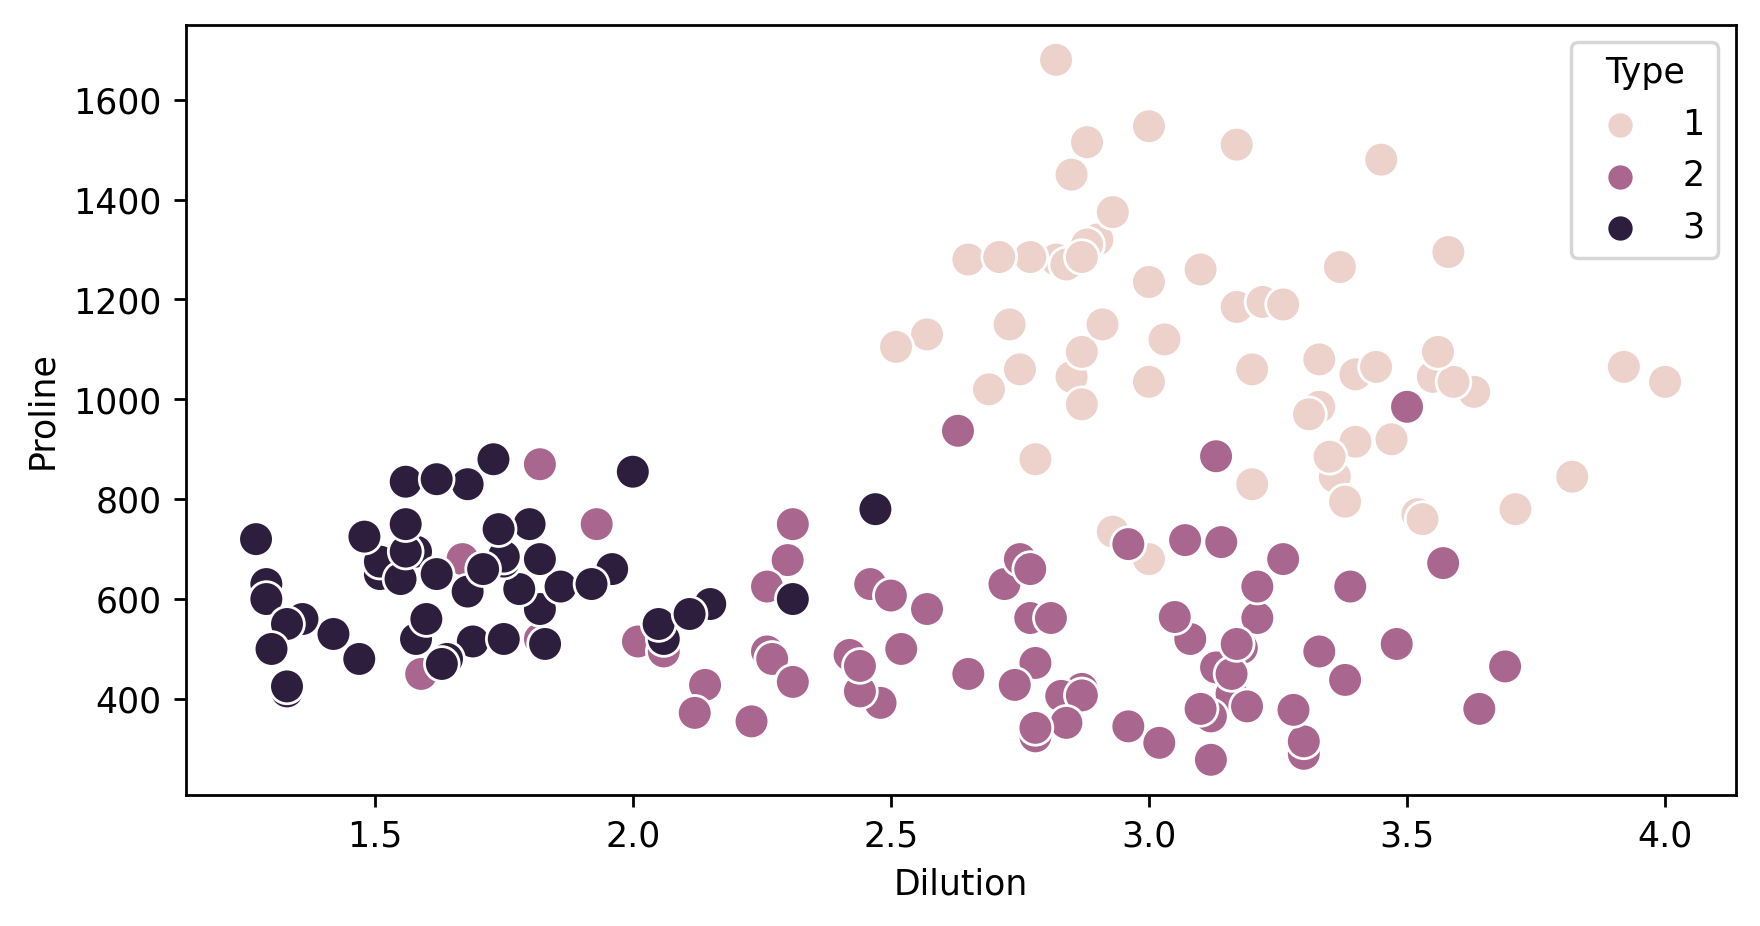

In [15]:
sns.scatterplot(x = df['Dilution'], y = df['Proline'], hue = df['Type'], s = 100)

In [16]:
# PCA

In [17]:
x = df.iloc[:,1:]
y = df['Type']

In [18]:
# Standardization

In [19]:
sc = StandardScaler()
x = sc.fit_transform(x)
pd.DataFrame(x, columns = ['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'])

Alcohol     Malic       Ash  Alcalinity  Magnesium   Phenols  \
0    1.518613 -0.562250  0.232053   -1.169593   1.913905  0.808997   
1    0.246290 -0.499413 -0.827996   -2.490847   0.018145  0.568648   
2    0.196879  0.021231  1.109334   -0.268738   0.088358  0.808997   
3    1.691550 -0.346811  0.487926   -0.809251   0.930918  2.491446   
4    0.295700  0.227694  1.840403    0.451946   1.281985  0.808997   
..        ...       ...       ...         ...        ...       ...   
173  0.876275  2.974543  0.305159    0.301803  -0.332922 -0.985614   
174  0.493343  1.412609  0.414820    1.052516   0.158572 -0.793334   
175  0.332758  1.744744 -0.389355    0.151661   1.422412 -1.129824   
176  0.209232  0.227694  0.012732    0.151661   1.422412 -1.033684   
177  1.395086  1.583165  1.365208    1.502943  -0.262708 -0.392751   

     Flavanoids  Nonflavanoids  Proanthocyanins     Color       Hue  Dilution  \
0      1.034819      -0.659563         1.224884  0.251717  0.362177  1.847920   
1      0.733629      -0.820719        -0.544721 -0.293321  0.406051  1.113449   
2      1.215533      -0.498407         2.135968  0.269020  0.318304  0.788587   
3      1.466525      -0.981875         1.032155  1.186068 -0.427544  1.184071   
4      0.663351       0.226796         0.401404 -0.319276  0.362177  0.449601   
..          ...            ...              ...       ...       ...       ...   
173   -1.424900       1.274310        -0.930179  1.142811 -1.392758 -1.231206   
174   -1.284344       0.549108        -0.316950  0.969783 -1.129518 -1.485445   
175   -1.344582       0.549108        -0.422075  2.224236 -1.612125 -1.485445   
176   -1.354622       1.354888        -0.229346  1.834923 -1.568252 -1.400699   
177   -1.274305       1.596623        -0.422075  1.791666 -1.524378 -1.428948   

      Proline  
0    1.013009  
1    0.965242  
2    1.395148  
3    2.334574  
4   -0.037874  
..        ...  
173 -0.021952  
174  0.009893  
175  0.280575  
176  0.296498  
177 -0.595160  

[178 rows x 13 columns]

In [20]:
pca = PCA()
pcs = pca.fit_transform(x)
pcs

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [21]:
pd.DataFrame(pcs)

0         1         2         3         4         5         6   \
0    3.316751 -1.443463 -0.165739 -0.215631  0.693043 -0.223880  0.596427   
1    2.209465  0.333393 -2.026457 -0.291358 -0.257655 -0.927120  0.053776   
2    2.516740 -1.031151  0.982819  0.724902 -0.251033  0.549276  0.424205   
3    3.757066 -2.756372 -0.176192  0.567983 -0.311842  0.114431 -0.383337   
4    1.008908 -0.869831  2.026688 -0.409766  0.298458 -0.406520  0.444074   
..        ...       ...       ...       ...       ...       ...       ...   
173 -3.370524 -2.216289 -0.342570  1.058527 -0.574164 -1.108788  0.958416   
174 -2.601956 -1.757229  0.207581  0.349496  0.255063 -0.026465  0.146894   
175 -2.677839 -2.760899 -0.940942  0.312035  1.271355  0.273068  0.679235   
176 -2.387017 -2.297347 -0.550696 -0.688285  0.813955  1.178783  0.633975   
177 -3.208758 -2.768920  1.013914  0.596903 -0.895193  0.296092  0.005741   

           7         8         9         10        11        12  
0    0.065139  0.641443  1.020956 -0.451563  0.540810 -0.066239  
1    1.024416 -0.308847  0.159701 -0.142657  0.388238  0.003637  
2   -0.344216 -1.177834  0.113361 -0.286673  0.000584  0.021717  
3    0.643593  0.052544  0.239413  0.759584 -0.242020 -0.369484  
4    0.416700  0.326819 -0.078366 -0.525945 -0.216664 -0.079364  
..        ...       ...       ...       ...       ...       ...  
173 -0.146097 -0.022498 -0.304117  0.139228  0.170786 -0.114427  
174 -0.552427 -0.097969 -0.206061  0.258198 -0.279431 -0.187371  
175  0.047024  0.001222 -0.247997  0.512492  0.698766  0.072078  
176  0.390829  0.057448  0.491490  0.299822  0.339821 -0.021866  
177 -0.292914  0.741660 -0.117969 -0.229964 -0.188788 -0.323965  

[178 rows x 13 columns]

In [22]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [23]:
# We have to do cumulative sum of all pcs values to get how much % of variance it has captured.

In [24]:
np.cumsum(pca.explained_variance_ratio_)

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

In [25]:
# We can see that 10th PC has captured the 96% of variance(data).

In [26]:
# Visualizing PC's (Scree Plot)

Text(0.5, 1.0, 'Scree Plot')

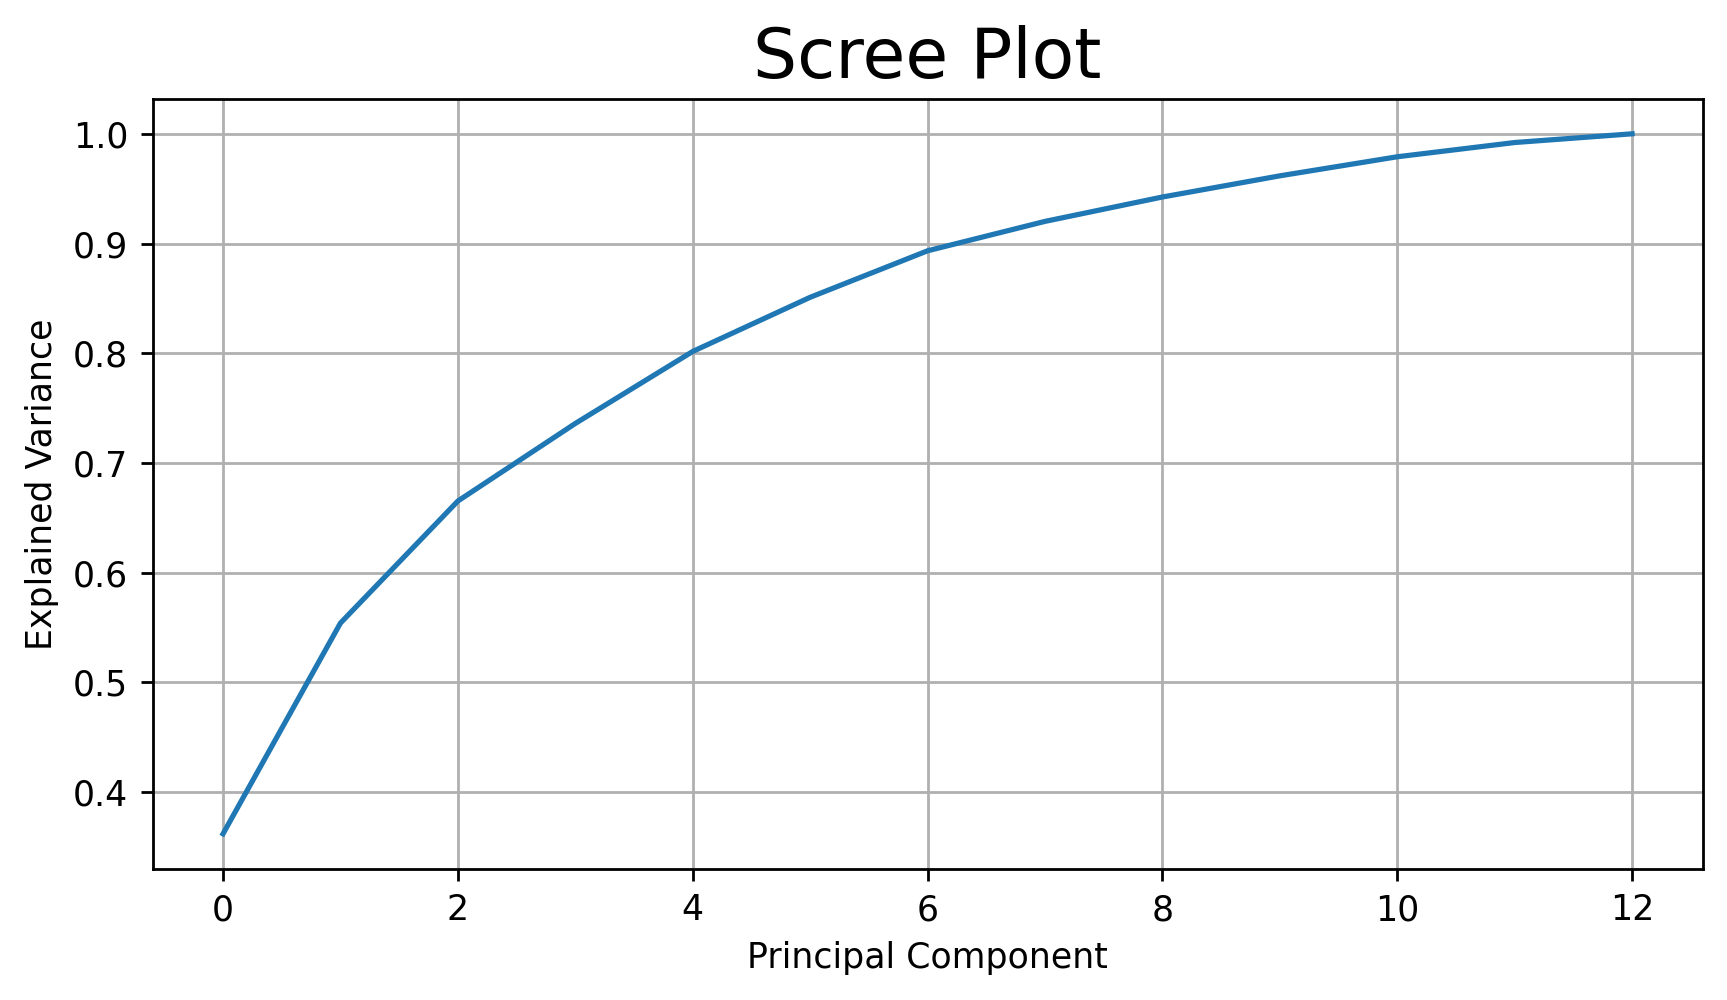

In [27]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.title('Scree Plot', size = 20)

In [28]:
# Here also we can see that at 10th Principal COmponent(PC) it has covered more that 95% pf data.

In [29]:
# But according to problem statement we have do clustering using first 3 principal component scores

In [30]:
# Defining n_components in PCA.

In [31]:
pca = PCA(n_components = 4)
pcs = pca.fit_transform(x)
pcs

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01,
        -2.15631188e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00,
        -2.91358318e-01],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01,
         7.24902309e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01,
         5.67983308e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00,
        -4.09765788e-01],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01,
        -5.15637495e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01,
        -6.58305046e-02],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01,
        -1.19260801e+00],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00,
         5.62703612e-02],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01,
         3.49381568e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01,
         2.68417600e-02],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00,
      

In [32]:
data = pd.DataFrame(pcs, columns = ['Alcohol', 'Malic', 'Ash', 'Alcalinity'])
data['Type'] = y
data

Alcohol     Malic       Ash  Alcalinity  Type
0    3.316751 -1.443463 -0.165739   -0.215631     1
1    2.209465  0.333393 -2.026457   -0.291358     1
2    2.516740 -1.031151  0.982819    0.724902     1
3    3.757066 -2.756372 -0.176192    0.567983     1
4    1.008908 -0.869831  2.026688   -0.409766     1
..        ...       ...       ...         ...   ...
173 -3.370524 -2.216289 -0.342570    1.058527     3
174 -2.601956 -1.757229  0.207581    0.349496     3
175 -2.677839 -2.760899 -0.940942    0.312035     3
176 -2.387017 -2.297347 -0.550696   -0.688285     3
177 -3.208758 -2.768920  1.013914    0.596903     3

[178 rows x 5 columns]

In [33]:
# Here by performing PCA we have reduced dimensionality of dataset

In [34]:
# CLustering

In [35]:
x = data.iloc[:,:3]
x

Alcohol     Malic       Ash
0    3.316751 -1.443463 -0.165739
1    2.209465  0.333393 -2.026457
2    2.516740 -1.031151  0.982819
3    3.757066 -2.756372 -0.176192
4    1.008908 -0.869831  2.026688
..        ...       ...       ...
173 -3.370524 -2.216289 -0.342570
174 -2.601956 -1.757229  0.207581
175 -2.677839 -2.760899 -0.940942
176 -2.387017 -2.297347 -0.550696
177 -3.208758 -2.768920  1.013914

[178 rows x 3 columns]

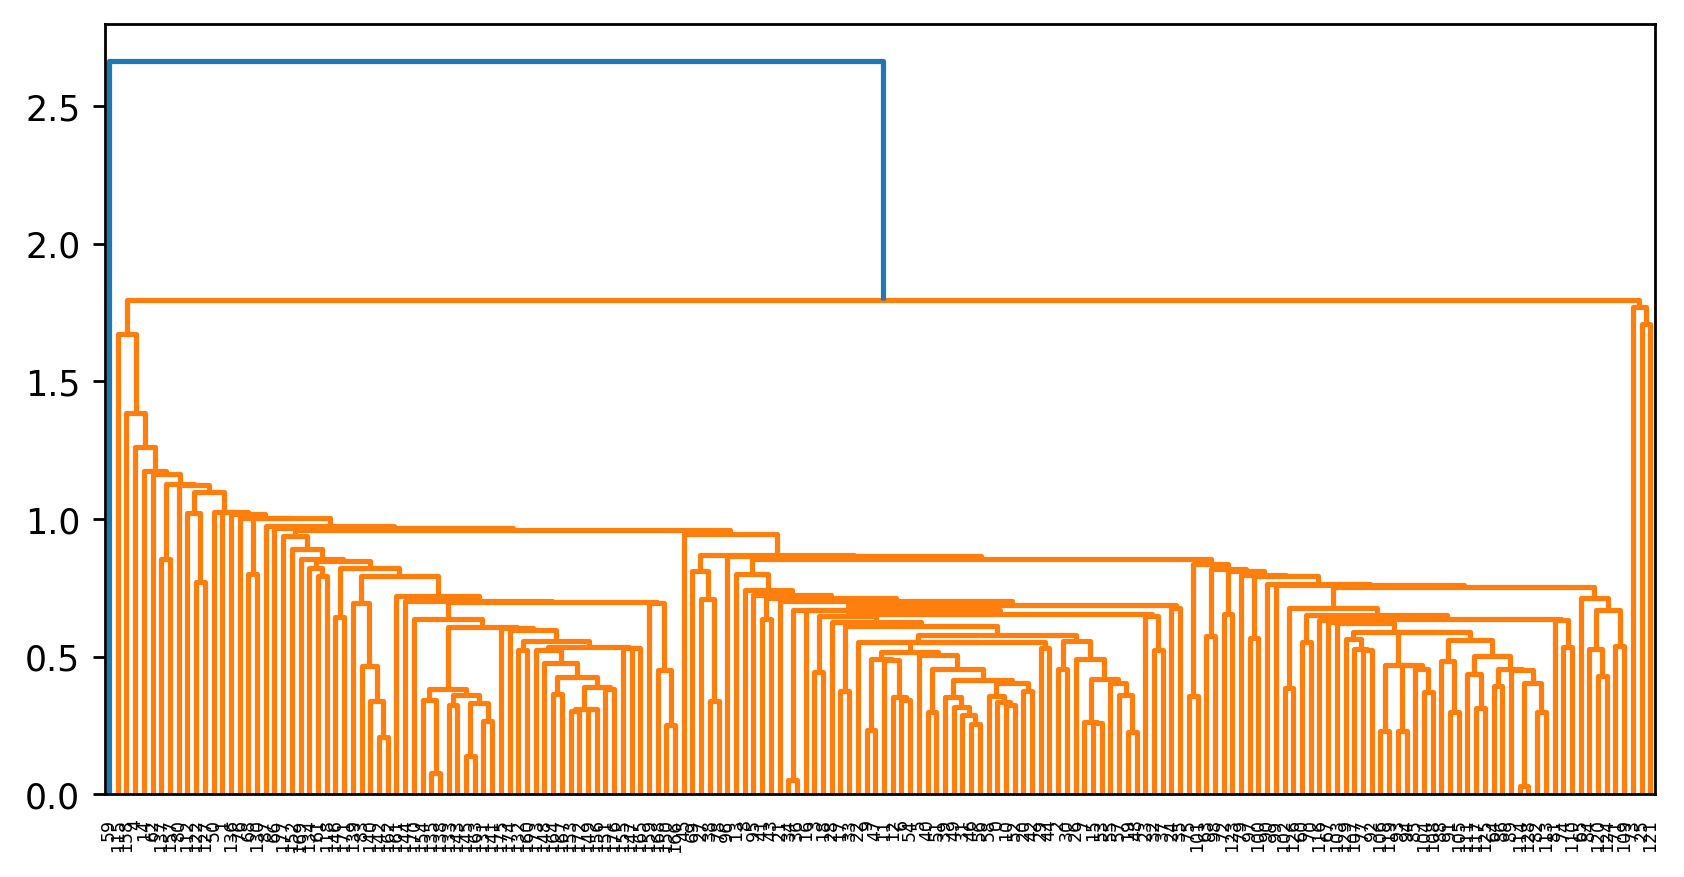

In [36]:
lk = hierarchy.linkage(x, method='single')
dendrogram = hierarchy.dendrogram(lk)

In [37]:
# There is overlaping of clusters in single linkage hierarchical clustering
# To remove overlaping we have to use complete linkage method

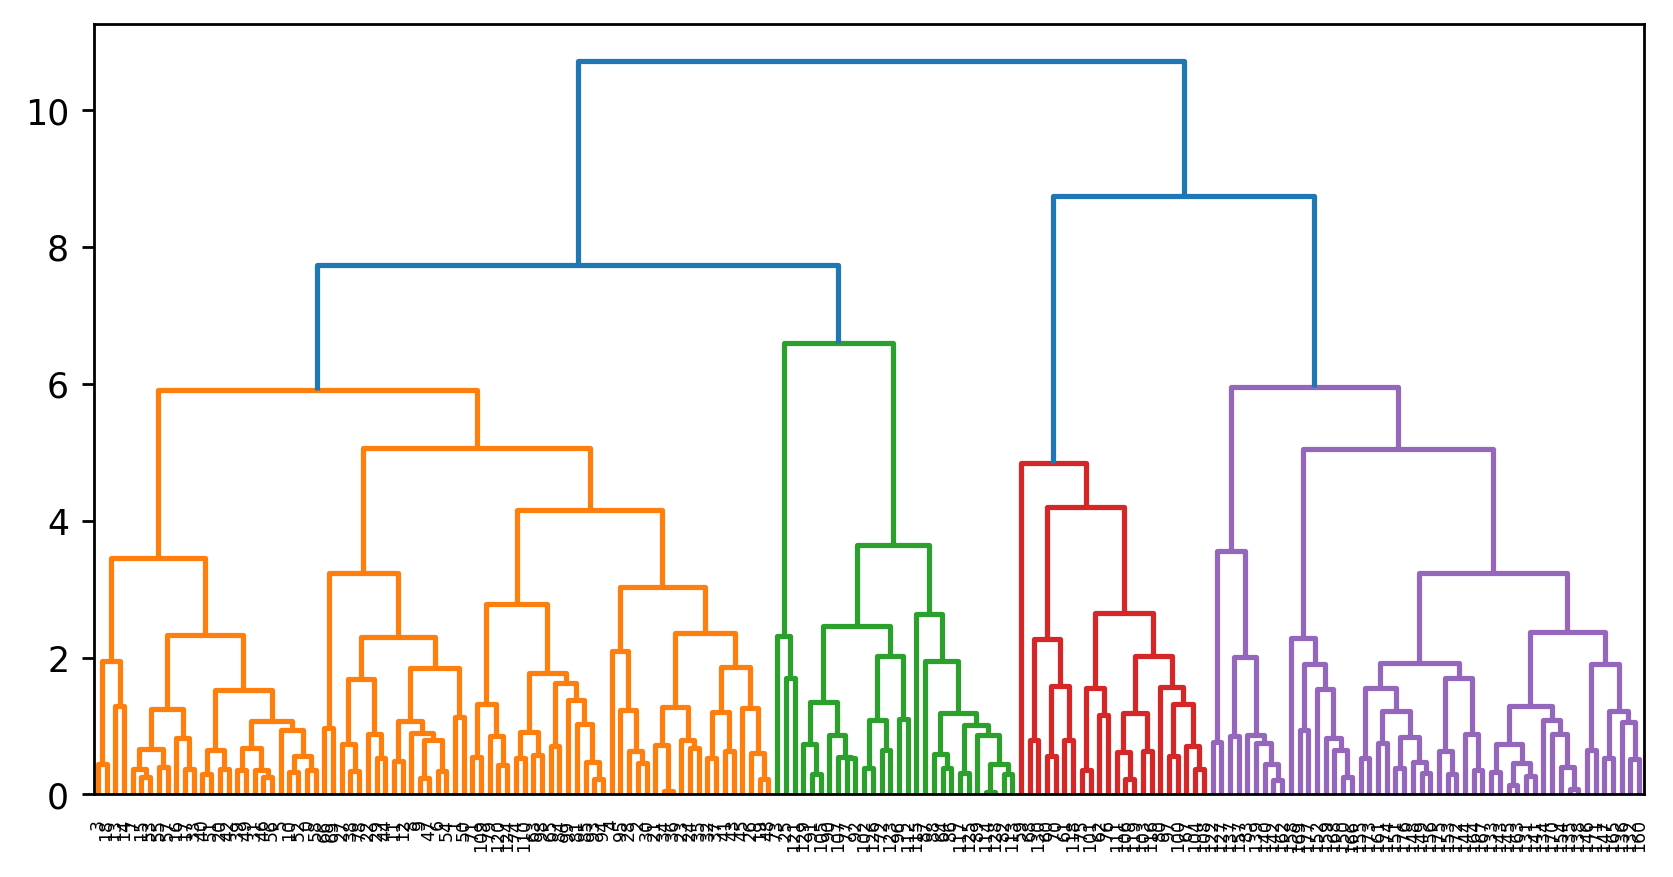

In [38]:
lk1 = hierarchy.linkage(x, method='complete')
dendrogram = hierarchy.dendrogram(lk1)

In [39]:
# Now we can see there is no overlaping of clusters made by complete linkage method

In [40]:
# Choosing optimal no. of clusters and making cutting line on dendrogram

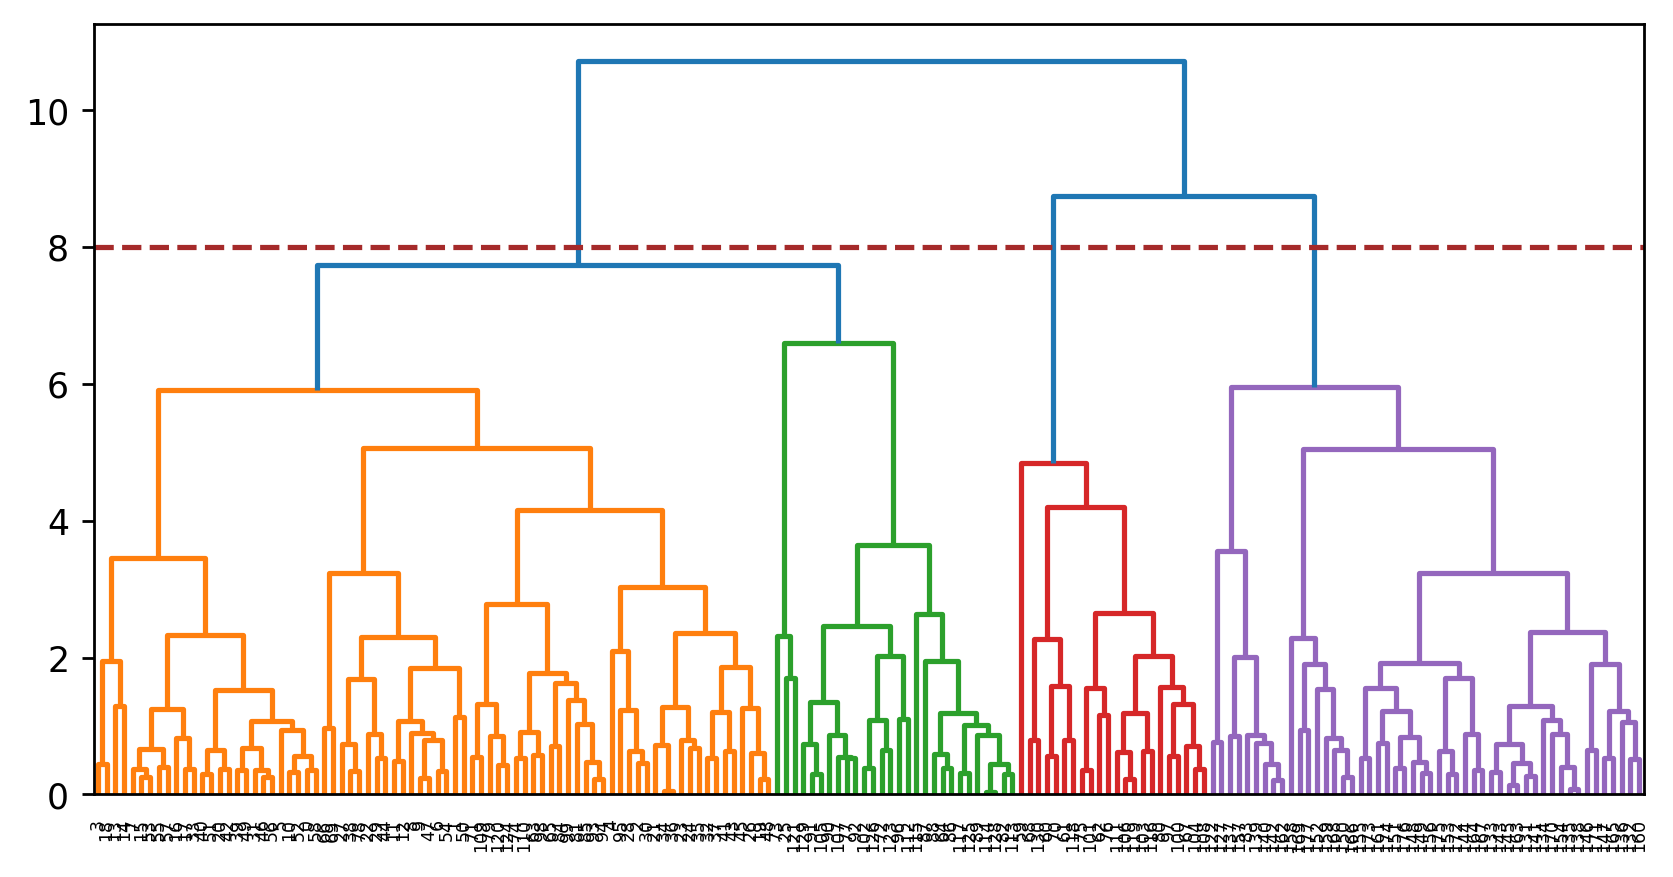

In [41]:
lk1 = hierarchy.linkage(x, method='complete')
dendrogram = hierarchy.dendrogram(lk1)
plt.axhline(y = 8, linestyle = '--', color = 'brown')

In [42]:
hc = AgglomerativeClustering(n_clusters=3)
ypred = hc.fit_predict(x)
ypred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [43]:
data['Hierar_Clustrs'] = ypred
data

Alcohol     Malic       Ash  Alcalinity  Type  Hierar_Clustrs
0    3.316751 -1.443463 -0.165739   -0.215631     1               2
1    2.209465  0.333393 -2.026457   -0.291358     1               2
2    2.516740 -1.031151  0.982819    0.724902     1               2
3    3.757066 -2.756372 -0.176192    0.567983     1               2
4    1.008908 -0.869831  2.026688   -0.409766     1               2
..        ...       ...       ...         ...   ...             ...
173 -3.370524 -2.216289 -0.342570    1.058527     3               1
174 -2.601956 -1.757229  0.207581    0.349496     3               1
175 -2.677839 -2.760899 -0.940942    0.312035     3               1
176 -2.387017 -2.297347 -0.550696   -0.688285     3               1
177 -3.208758 -2.768920  1.013914    0.596903     3               1

[178 rows x 6 columns]

In [44]:
data[data['Hierar_Clustrs']==0]

Alcohol     Malic       Ash  Alcalinity  Type  Hierar_Clustrs
59  -0.928582  3.073486 -4.585064   -1.051844     2               0
60  -1.542480  1.381444 -0.874683   -2.890120     2               0
61  -1.836250  0.829984 -1.605702   -1.452105     2               0
62   0.030607  1.262786 -1.784408   -1.206576     2               0
63   2.050262  1.925033 -0.007369    0.721322     2               0
..        ...       ...       ...         ...   ...             ...
127 -1.597159  1.208144  3.361176   -0.219278     2               0
128 -0.479565  1.938841  1.296508    0.686976     2               0
129 -1.792833  1.150288  0.782800    1.478779     2               0
130 -1.327102 -0.170389 -1.180013   -1.501710     3               0
134 -2.369869  0.459635 -1.101400   -0.856777     3               0

[66 rows x 6 columns]

In [45]:
data[data['Hierar_Clustrs']==1]

Alcohol     Malic       Ash  Alcalinity  Type  Hierar_Clustrs
83  -2.538977  0.087443  0.474251    0.758601     2               1
131 -2.384501 -0.374583 -0.723823   -0.308195     3               1
132 -2.936940 -0.263862 -0.167640   -0.408773     3               1
133 -2.146811 -0.368255 -0.453301    0.048528     3               1
135 -3.063842 -0.353413 -1.099124   -0.740398     3               1
136 -3.915754 -0.154583  0.221828   -0.009068     3               1
137 -3.936463 -0.659687  1.712215    0.545484     3               1
138 -3.094276 -0.348843 -1.026831   -0.071349     3               1
139 -2.374472 -0.291980  1.241914   -0.748806     3               1
140 -2.778813 -0.286805  0.609670   -0.879347     3               1
141 -2.286561 -0.372508 -0.971643   -0.371438     3               1
142 -2.985633 -0.489218  0.946953   -1.036226     3               1
143 -2.375195 -0.482334 -0.252884    0.671149     3               1
144 -2.209866 -1.160053 -1.245125    0.318838     3               1
145 -2.625621 -0.563161 -0.855961    0.275684     3               1
146 -4.280639 -0.649671 -1.458197    1.128164     3               1
147 -3.582641 -1.272703 -0.110784    1.049909     3               1
148 -2.807064 -1.570534 -0.472528    0.627358     3               1
149 -2.899659 -2.041057 -0.495960    0.471156     3               1
150 -2.320737 -2.356366  0.437682   -0.052260     3               1
151 -2.549831 -2.045283 -0.312268    0.386972     3               1
152 -1.812541 -1.527646  1.362590   -0.189396     3               1
153 -2.760145 -2.138932 -0.964629    0.668386     3               1
154 -2.737151 -0.409886 -1.190405   -0.663045     3               1
155 -3.604869 -1.802384 -0.094037    1.268840     3               1
156 -2.889826 -1.925219 -0.782323    1.324725     3               1
157 -3.392156 -1.311876  1.602026   -0.482842     3               1
158 -1.048182 -3.515090  1.160039    0.935329     3               1
159 -1.609912 -2.406638  0.548560    0.754310     3               1
160 -3.143131 -0.738161 -0.090999    0.980648     3               1
161 -2.240157 -1.175465 -0.101377   -1.165279     3               1
162 -2.847674 -0.556044  0.804215   -0.897888     3               1
163 -2.597497 -0.697966 -0.884940   -0.274229     3               1
164 -2.949299 -1.555309 -0.983401    0.015480     3               1
165 -3.530032 -0.882527 -0.466029    0.580790     3               1
166 -2.406111 -2.592356  0.428226   -0.184335     3               1
167 -2.929085 -1.274447 -1.213358    0.295316     3               1
168 -2.181413 -2.077537  0.763783   -0.389593     3               1
169 -2.380928 -2.588667  1.418044    0.588502     3               1
170 -3.211617  0.251249 -0.847129   -0.217065     3               1
171 -3.677919 -0.847748 -1.339420   -0.125176     3               1
172 -2.465556 -2.193798 -0.918781    0.018025     3               1
173 -3.370524 -2.216289 -0.342570    1.058527     3               1
174 -2.601956 -1.757229  0.207581    0.349496     3               1
175 -2.677839 -2.760899 -0.940942    0.312035     3               1
176 -2.387017 -2.297347 -0.550696   -0.688285     3               1
177 -3.208758 -2.768920  1.013914    0.596903     3               1

In [46]:
data[data['Hierar_Clustrs']==2]

Alcohol     Malic       Ash  Alcalinity  Type  Hierar_Clustrs
0    3.316751 -1.443463 -0.165739   -0.215631     1               2
1    2.209465  0.333393 -2.026457   -0.291358     1               2
2    2.516740 -1.031151  0.982819    0.724902     1               2
3    3.757066 -2.756372 -0.176192    0.567983     1               2
4    1.008908 -0.869831  2.026688   -0.409766     1               2
..        ...       ...       ...         ...   ...             ...
69   1.975620  1.403283 -1.238276   -1.152306     2               2
73   2.562227 -0.260199  3.374394   -0.979399     2               2
78   1.262931  0.770850 -1.184225   -0.925882     2               2
95   2.543865 -0.169274  0.788697   -1.032837     2               2
121  1.336322 -0.253337  5.345388    0.239038     2               2

[65 rows x 6 columns]

In [47]:
# Analyzing clusters

In [48]:
data.groupby('Hierar_Clustrs').agg('mean')

Alcohol     Malic       Ash  Alcalinity      Type
Hierar_Clustrs                                                    
0              -0.240234  1.719897  0.163079    0.044625  2.030303
1              -2.782034 -1.272012 -0.136247    0.130344  2.978723
2               2.255555 -0.826594 -0.067071   -0.139561  1.092308

In [49]:
# Here we can see the 
# Wines which are having very high alcalinity are clustered together in cluster no. 0
# Wines which are having moderate alcalinity are clustered together in cluster no. 1
# Wines which are having very less alcalinity are clustered together in cluster no. 2

In [50]:
data.groupby('Type').agg('mean')

Alcohol     Malic       Ash  Alcalinity  Hierar_Clustrs
Type                                                          
1     2.282739 -0.967874 -0.159555   -0.112334        2.000000
2    -0.038986  1.643483  0.261592    0.050966        0.183099
3    -2.748200 -1.241308 -0.190818    0.062689        0.958333

In [51]:
# Visualizig Hierarchical Clusters

<Axes: xlabel='Alcohol', ylabel='Malic'>

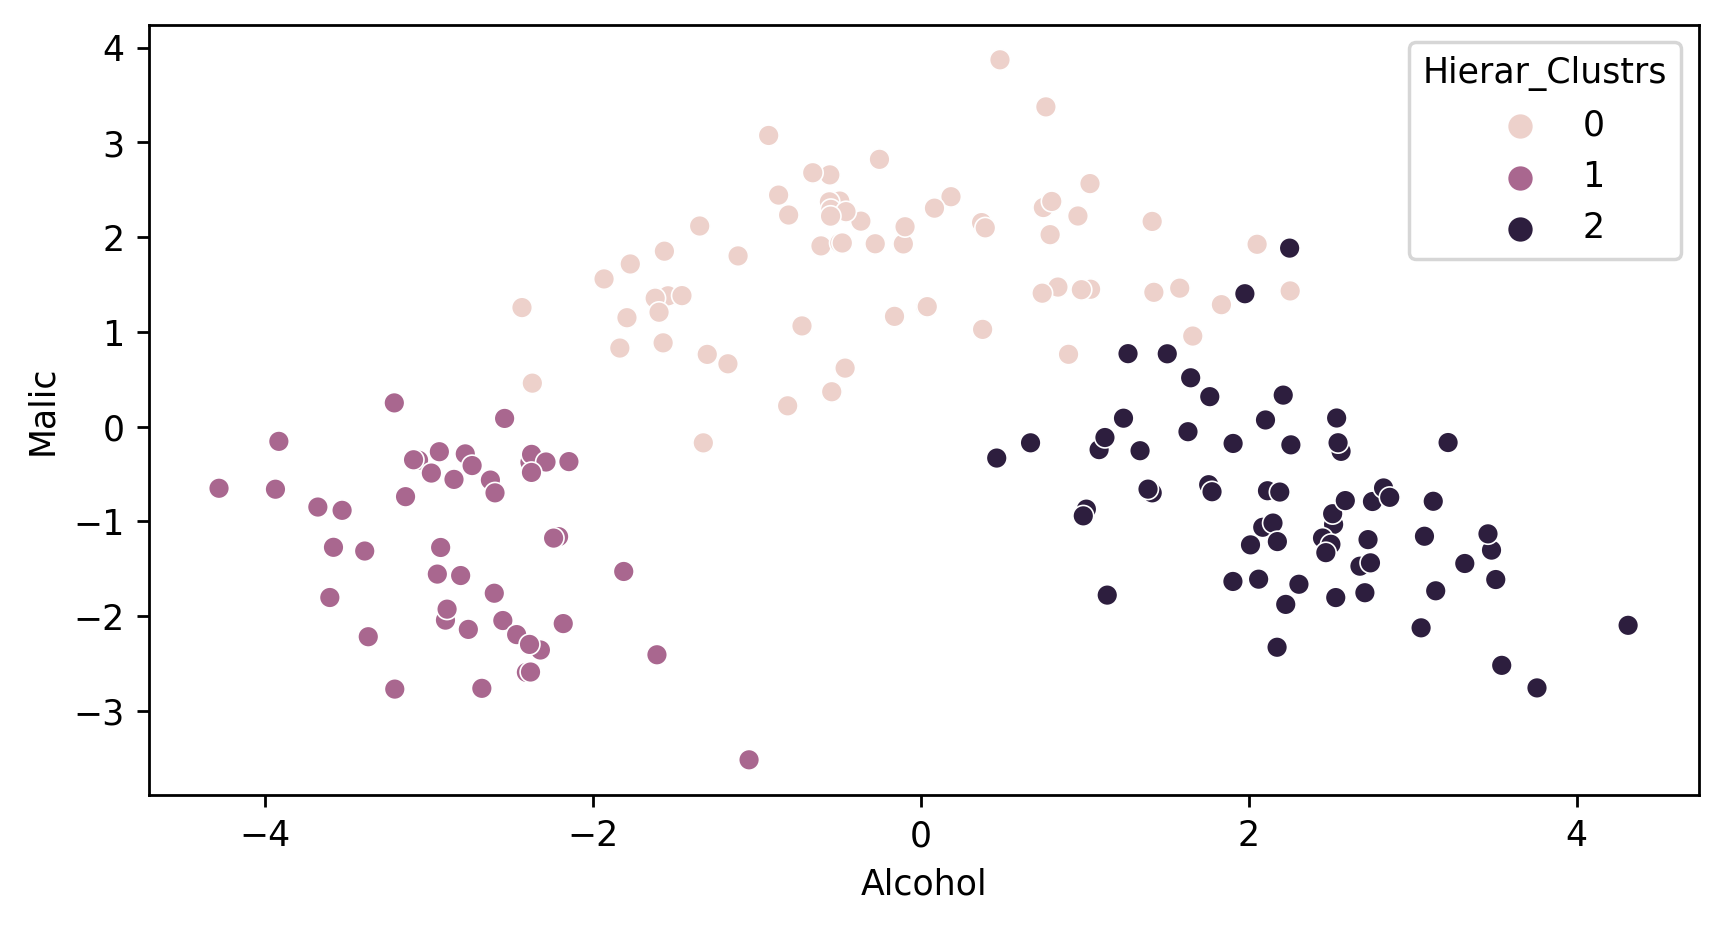

In [52]:
sns.scatterplot(x = data['Alcohol'], y = data['Malic'], hue = data['Hierar_Clustrs'])

<Axes: xlabel='Ash', ylabel='Alcalinity'>

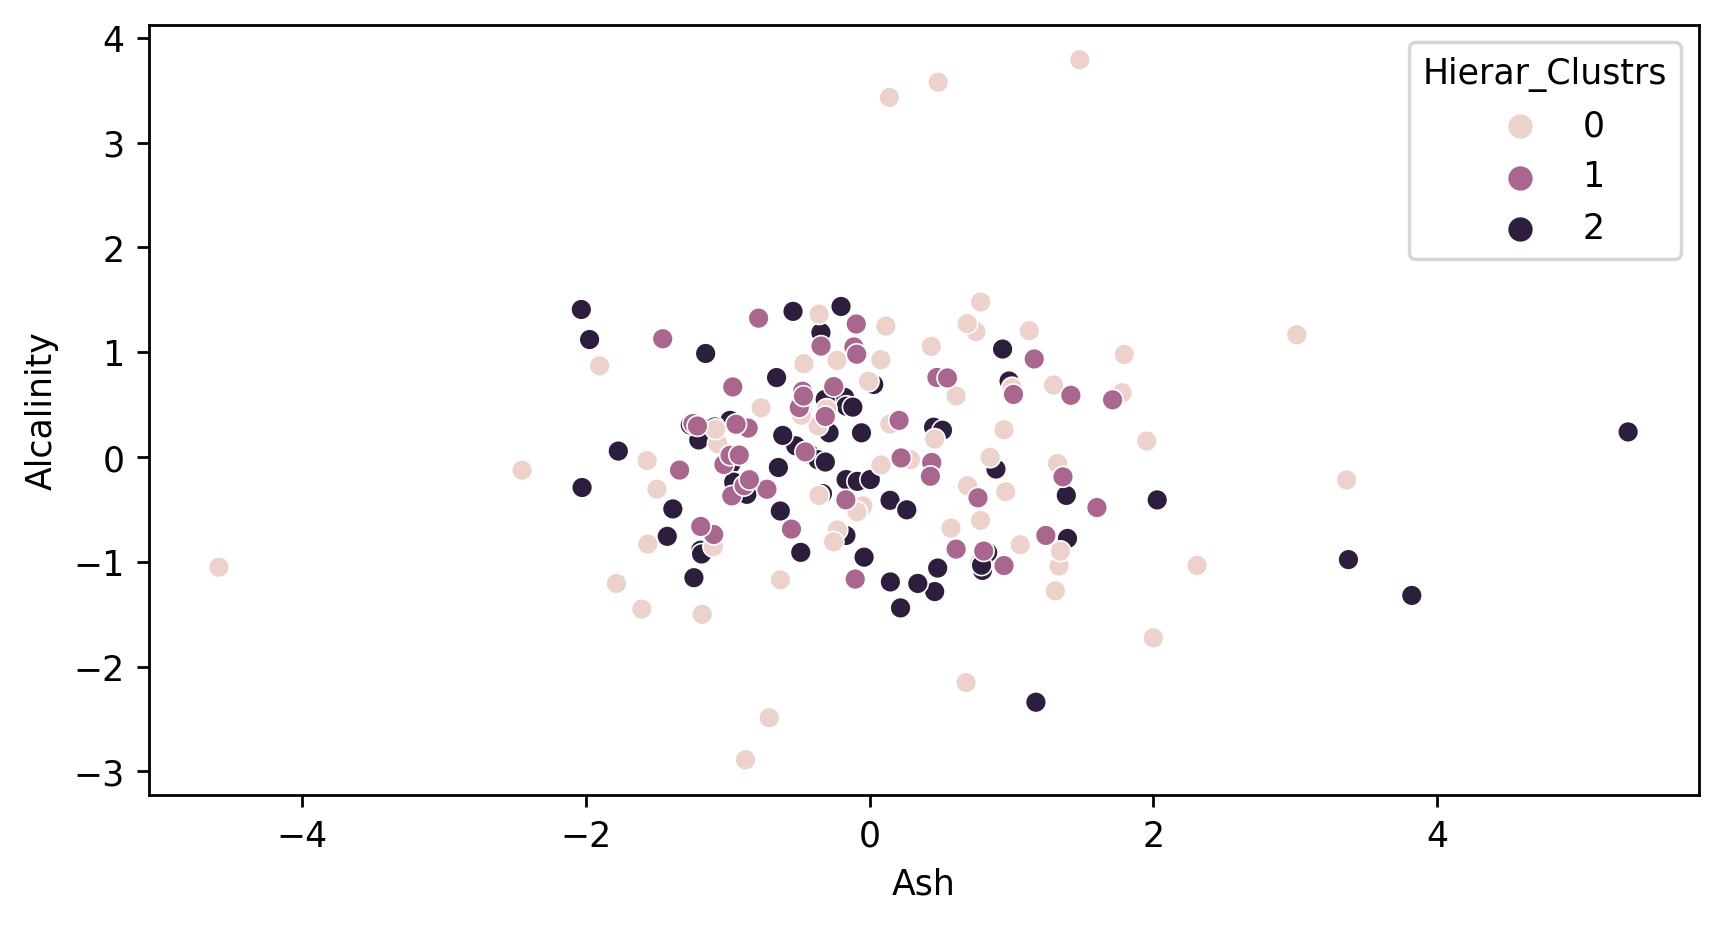

In [53]:
sns.scatterplot(x = data['Ash'], y = data['Alcalinity'], hue = data['Hierar_Clustrs'])

<Axes: xlabel='Alcohol', ylabel='Alcalinity'>

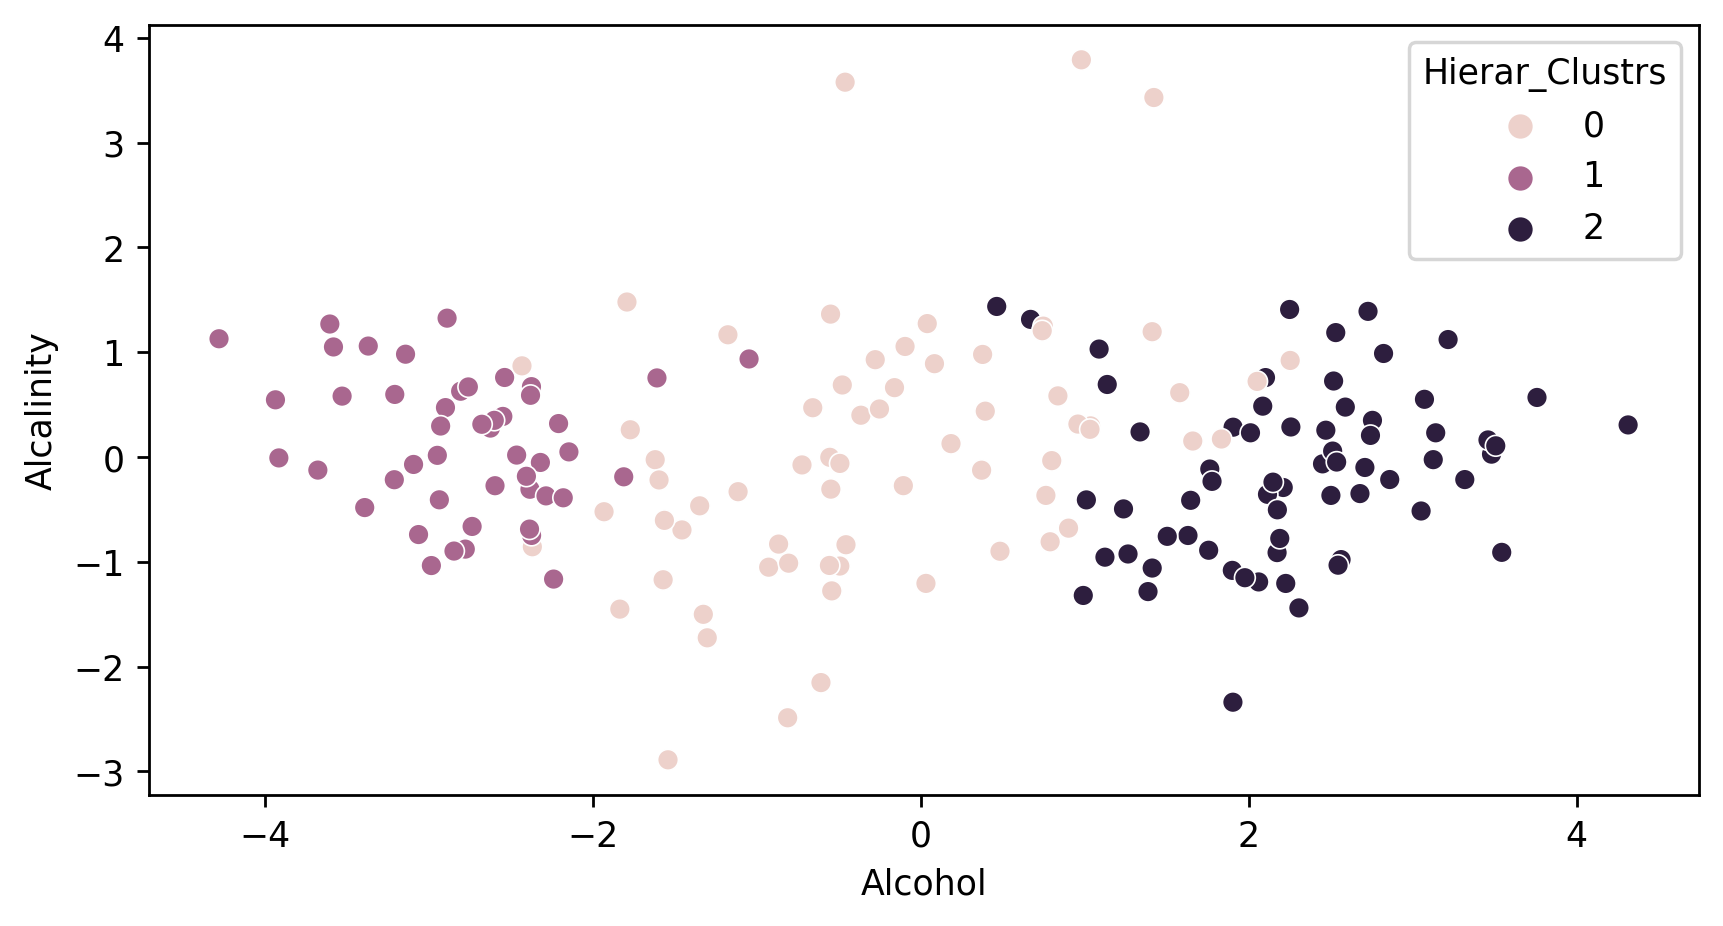

In [54]:
sns.scatterplot(x = data['Alcohol'], y = data['Alcalinity'], hue = data['Hierar_Clustrs'])

<Axes: xlabel='Malic', ylabel='Alcalinity'>

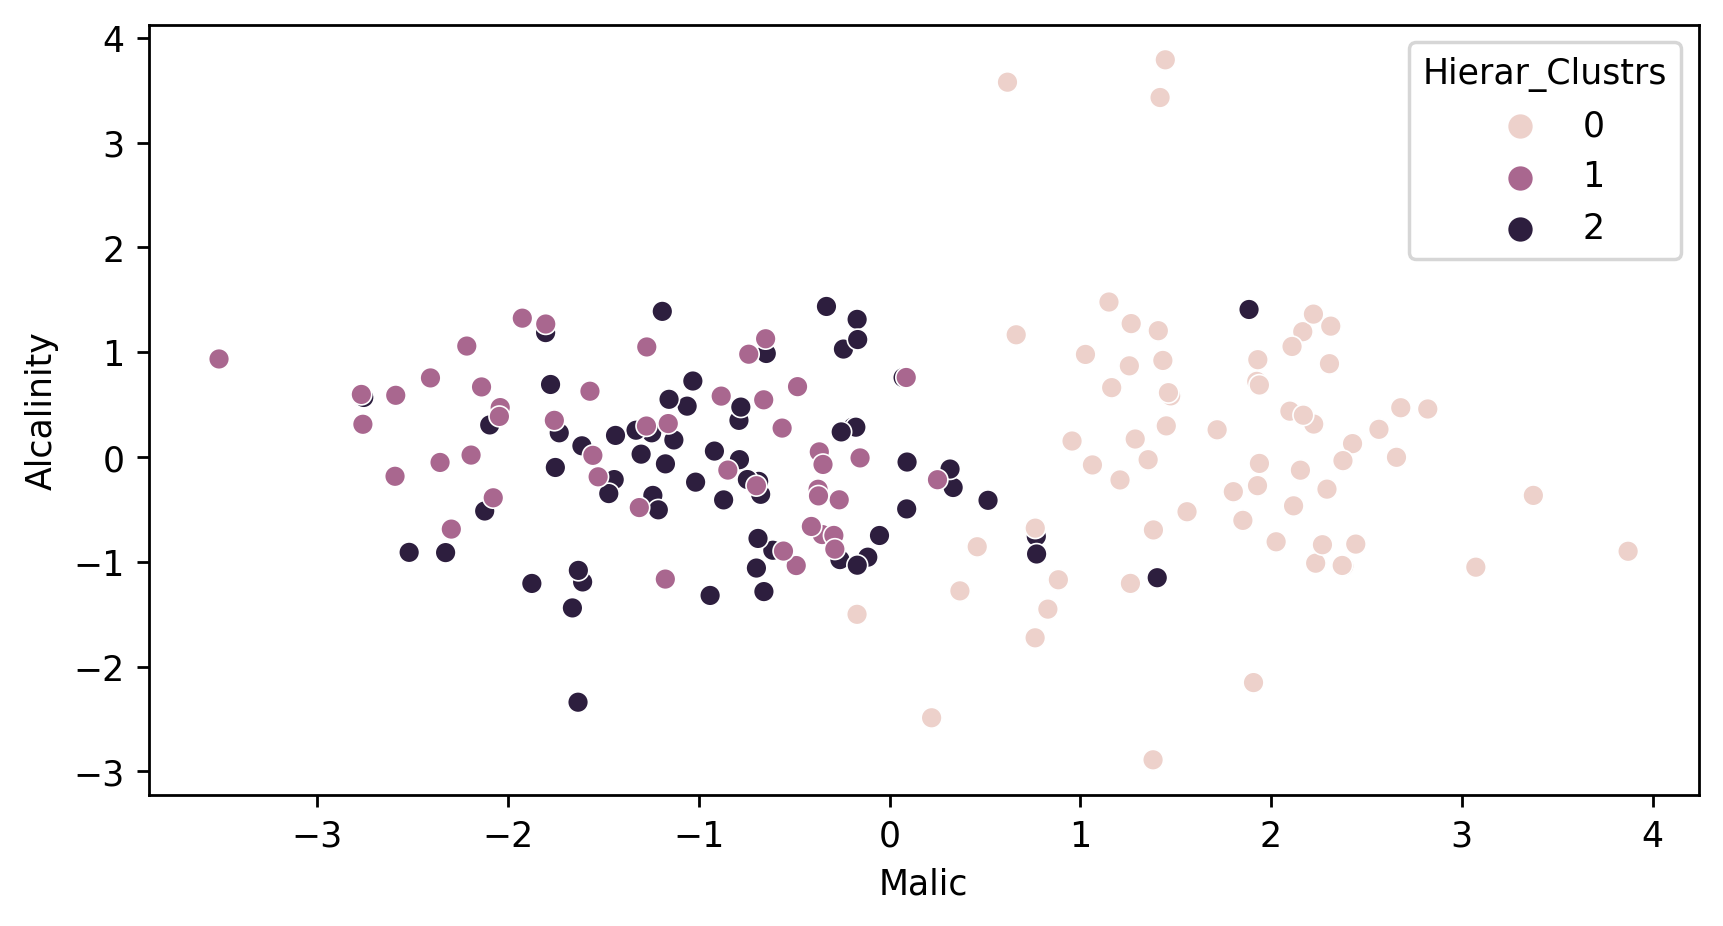

In [55]:
sns.scatterplot(x = data['Malic'], y = data['Alcalinity'], hue = data['Hierar_Clustrs'])

<Axes: xlabel='Malic', ylabel='Ash'>

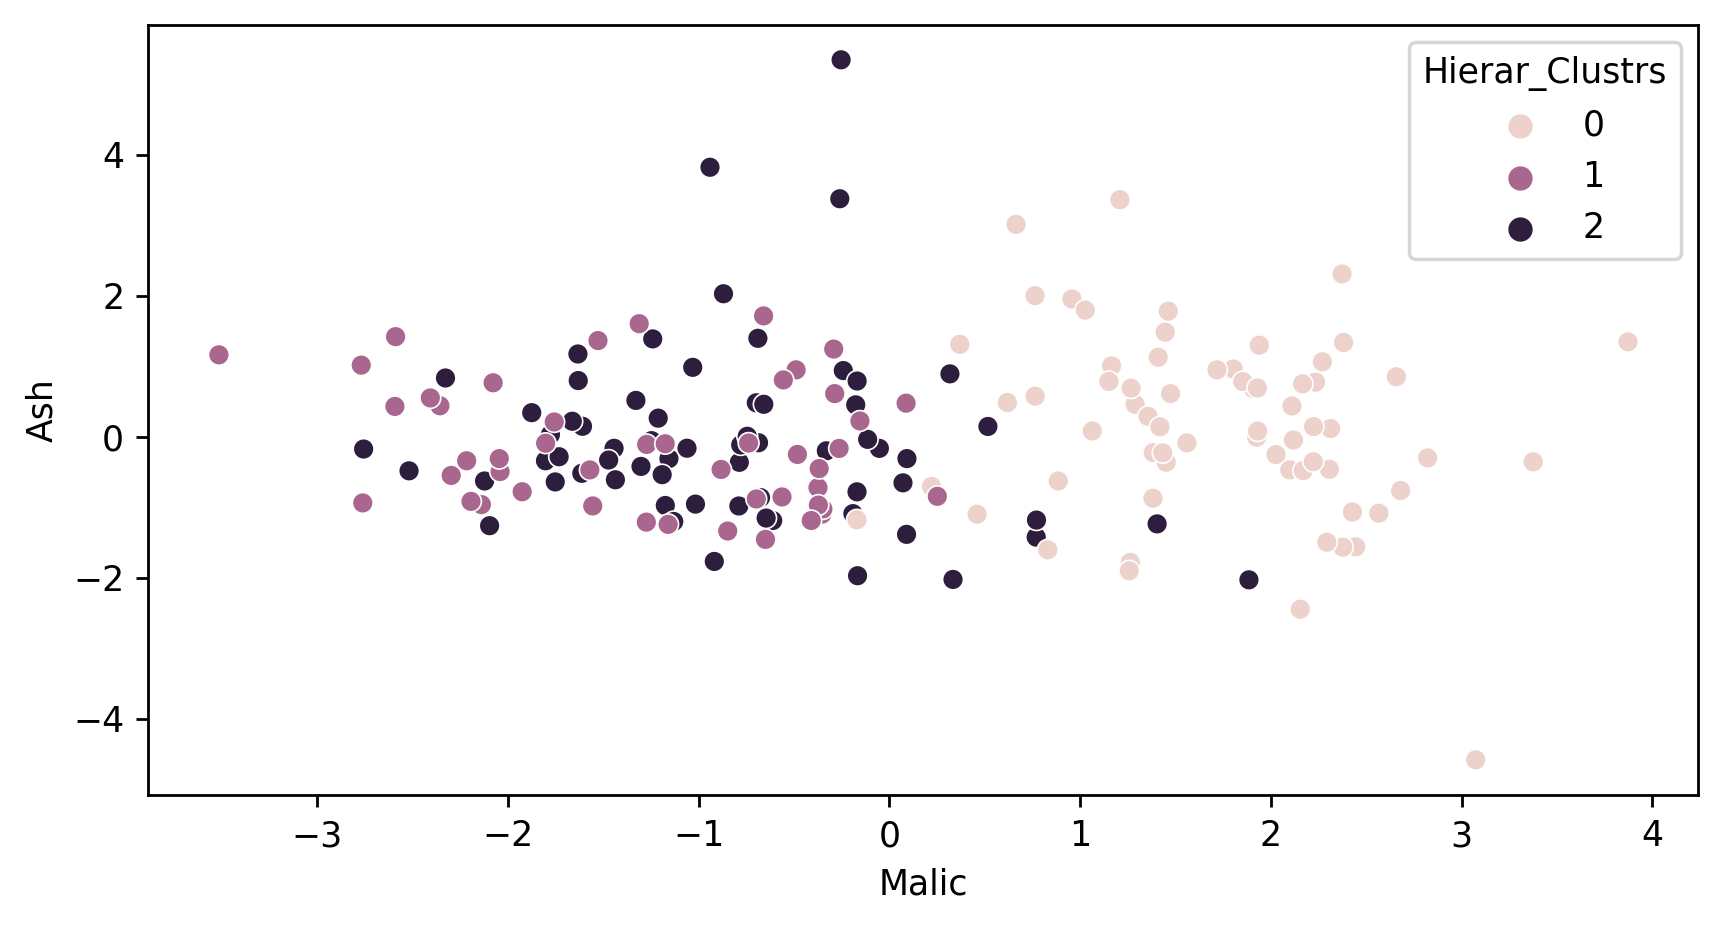

In [56]:
sns.scatterplot(x = data['Malic'], y = data['Ash'], hue = data['Hierar_Clustrs'])

In [57]:
# KMeans CLustering

In [58]:
km = KMeans()
yp = km.fit_predict(x) # by default it will create 8 no. of clusters
yp

array([2, 4, 2, 2, 7, 2, 2, 2, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 7,
       4, 7, 7, 6, 2, 4, 7, 4, 2, 2, 7, 2, 7, 7, 7, 7, 4, 2, 2, 4, 2, 7,
       4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 5, 3, 3, 5, 7, 1, 7,
       4, 5, 3, 4, 3, 7, 1, 6, 7, 5, 5, 1, 4, 1, 5, 5, 1, 3, 7, 5, 1, 1,
       1, 1, 1, 1, 1, 5, 5, 7, 1, 5, 7, 7, 5, 5, 1, 5, 5, 1, 5, 1, 5, 7,
       7, 1, 1, 1, 1, 1, 5, 1, 3, 5, 7, 6, 1, 1, 7, 1, 1, 1, 1, 1, 3, 3,
       3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0,
       0, 0])

In [59]:
km.cluster_centers_ # Centroids of clusters

array([[-2.67014936, -2.02321803,  0.14934854],
       [-0.77989817,  1.67672874,  1.01023781],
       [ 2.67469016, -1.49497514, -0.09172544],
       [-2.618858  , -0.2121347 , -0.59962689],
       [ 2.0771336 ,  0.01338762, -1.2373966 ],
       [ 0.1579045 ,  2.33072938, -1.00863129],
       [ 1.62954267, -0.48473427,  4.18023005],
       [ 1.46963094,  0.54665542,  0.68667528]])

In [60]:
# Visualizing clusters

Text(0.5, 1.0, 'Scatterplot Between Clusters & Centroids ')

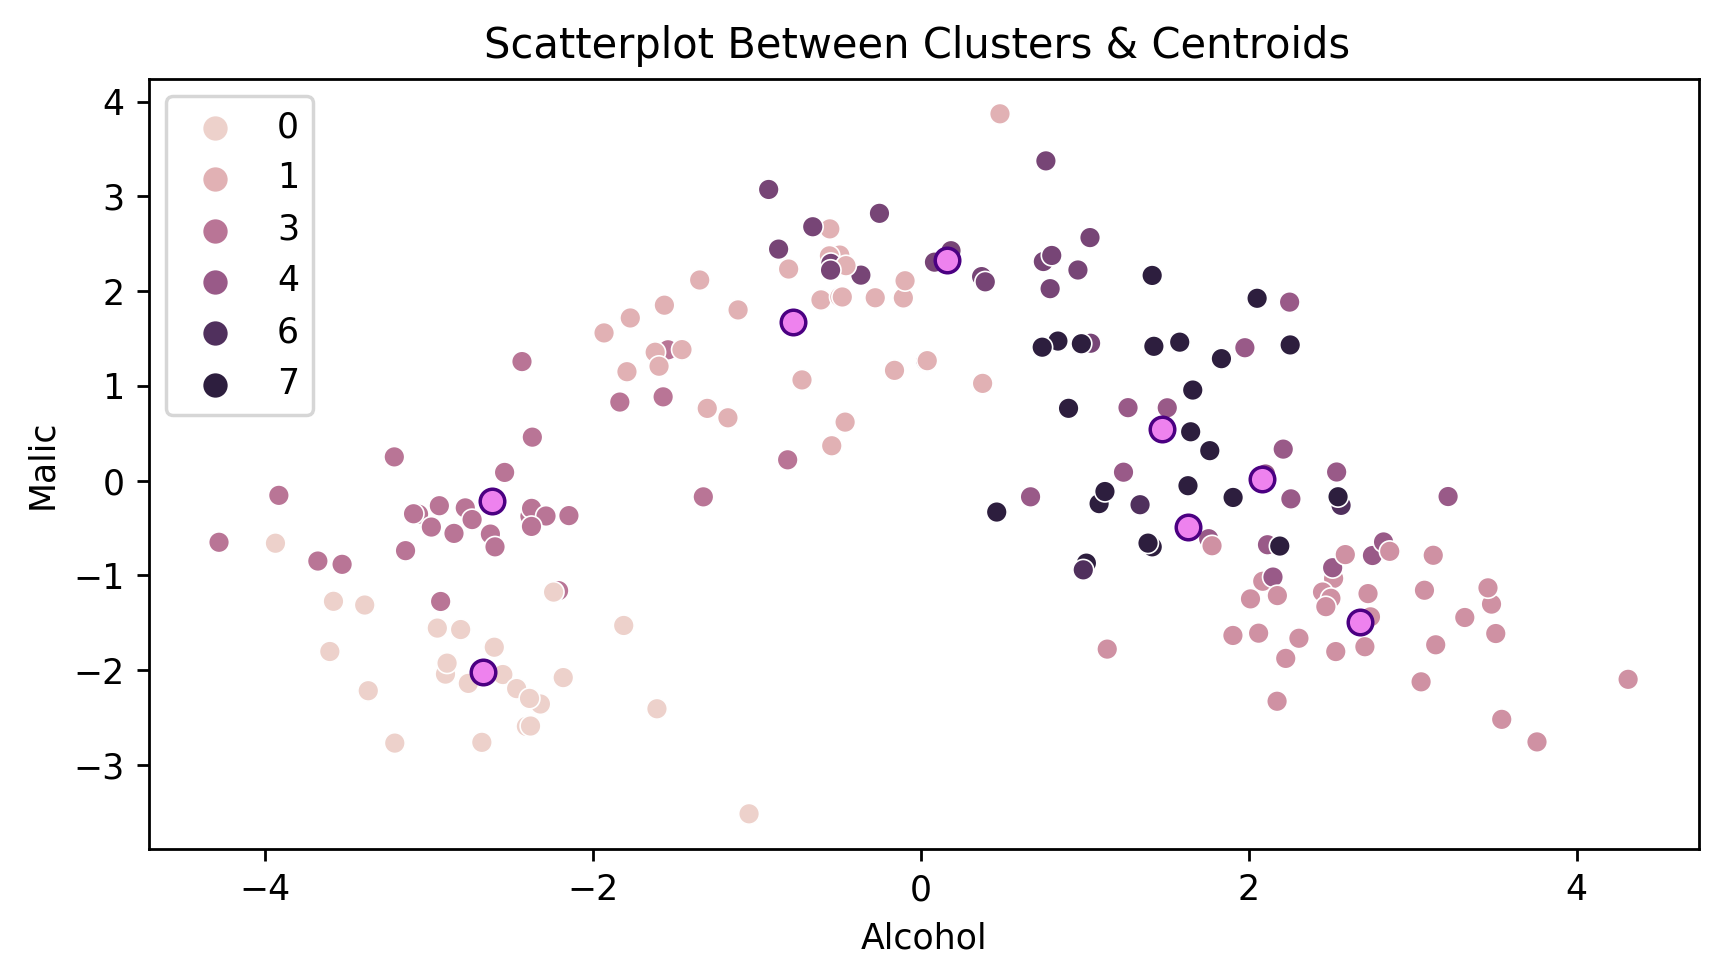

In [61]:
sns.scatterplot(x = data['Alcohol'], y = data['Malic'], hue = yp)
plt.legend(loc='upper left')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='violet', s=50, edgecolor = 'indigo')
plt.title('Scatterplot Between Clusters & Centroids ')

Text(0.5, 1.0, 'Scatterplot Between Clusters & Centroids ')

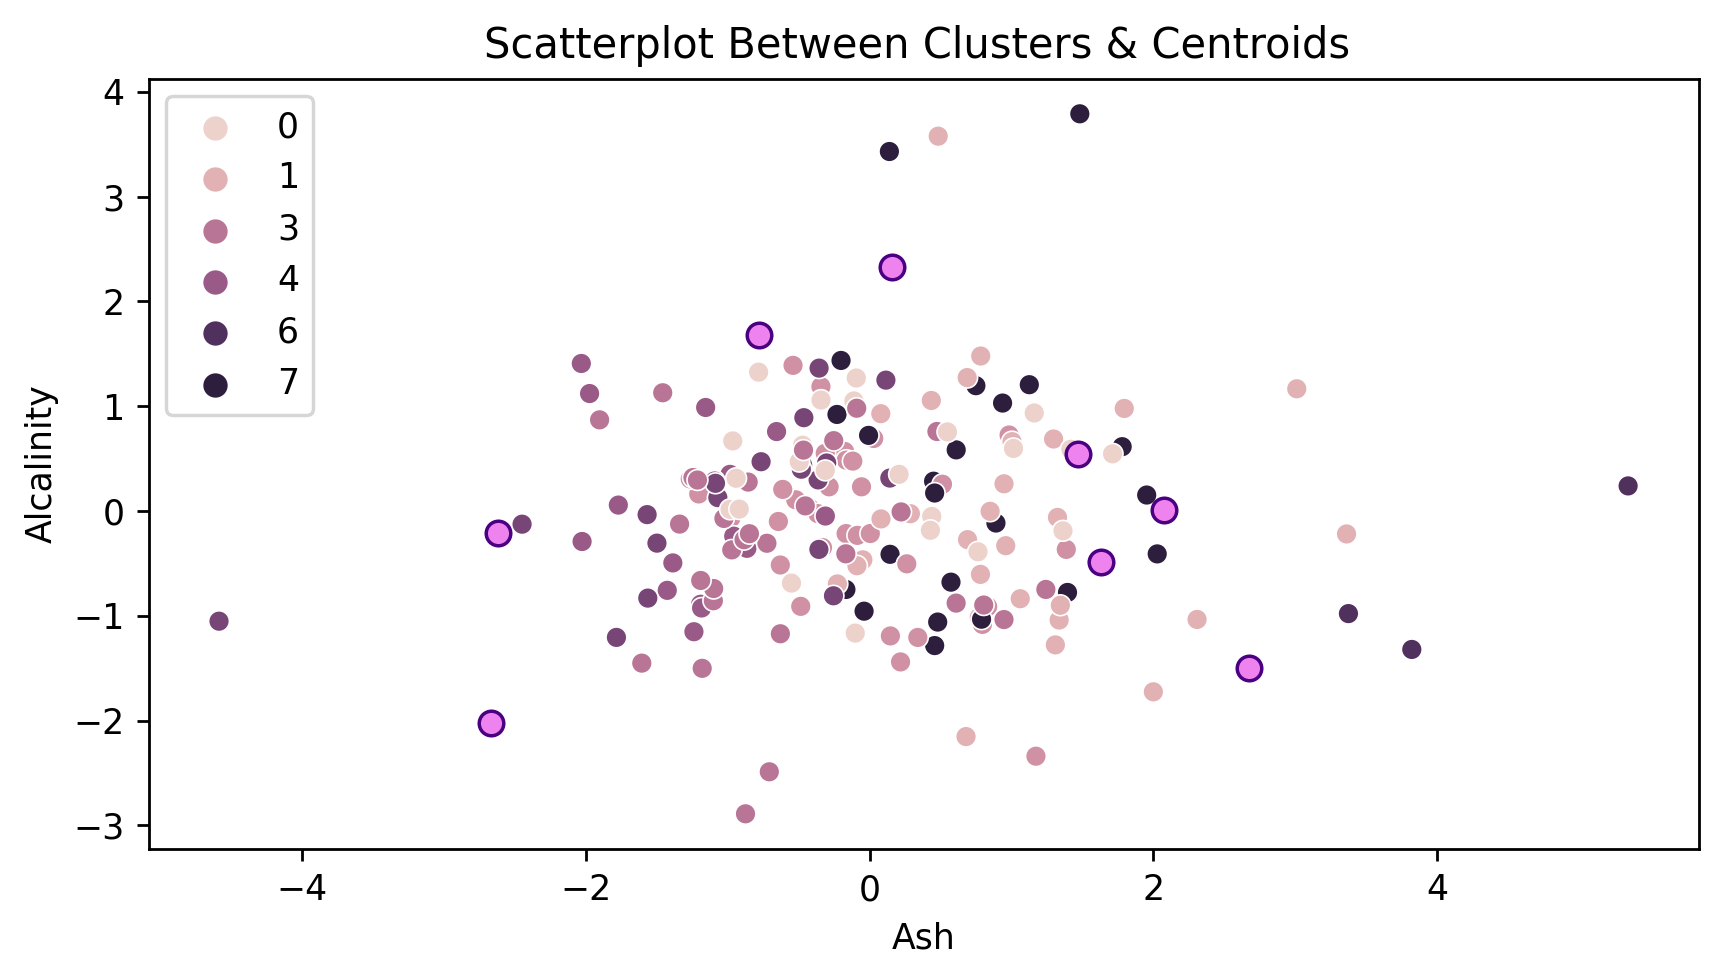

In [62]:
sns.scatterplot(x = data['Ash'], y = data['Alcalinity'], hue = yp)
plt.legend(loc='upper left')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='violet', s=50, edgecolor = 'indigo')
plt.title('Scatterplot Between Clusters & Centroids ')

Text(0.5, 1.0, 'Scatterplot Between Clusters & Centroids ')

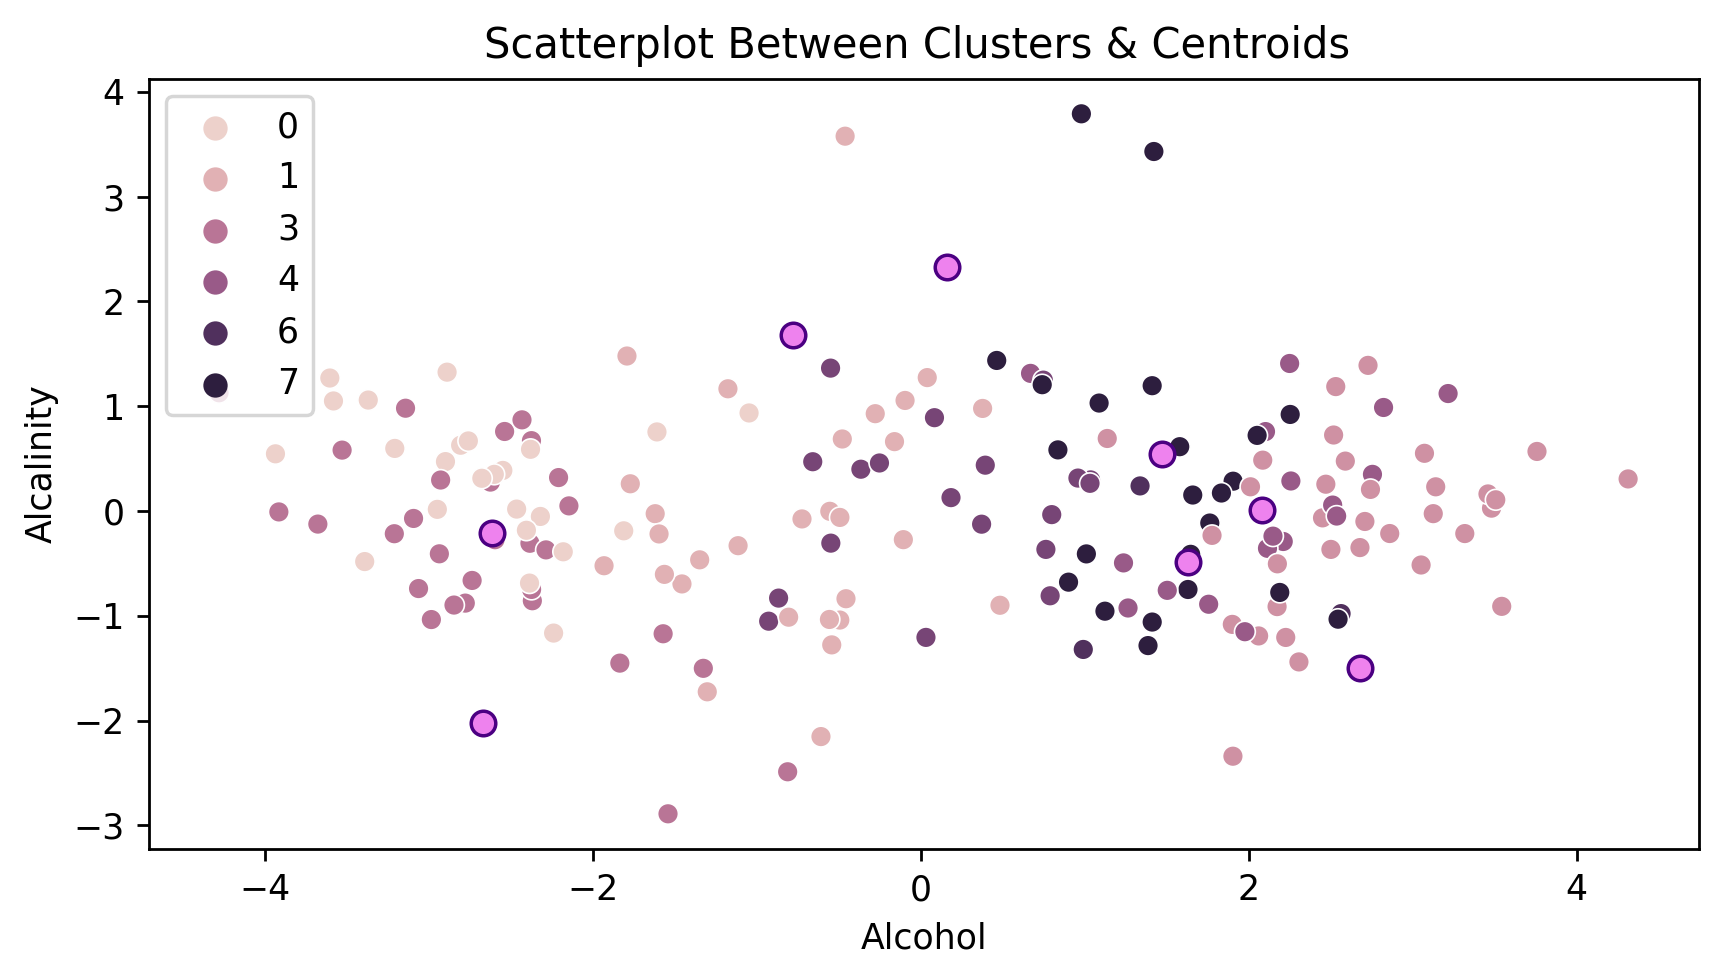

In [63]:
sns.scatterplot(x = data['Alcohol'], y = data['Alcalinity'], hue = yp)
plt.legend(loc='upper left')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='violet', s=50, edgecolor = 'indigo')
plt.title('Scatterplot Between Clusters & Centroids ')

Text(0.5, 1.0, 'Scatterplot Between Clusters & Centroids ')

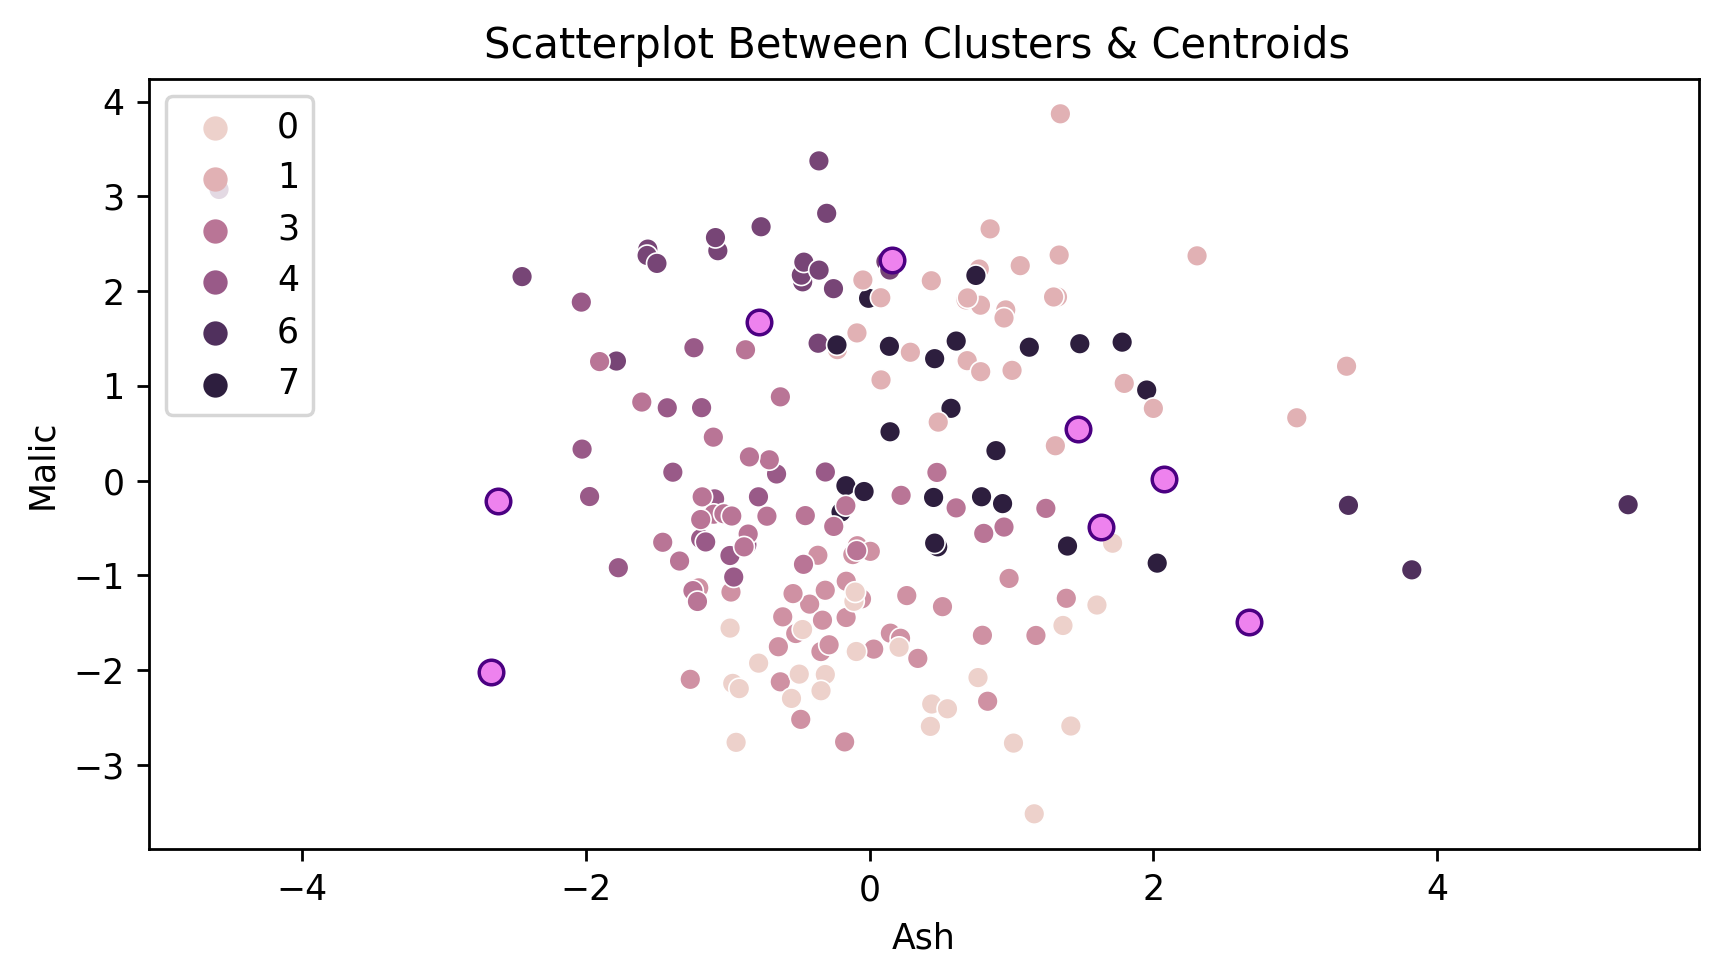

In [64]:
sns.scatterplot(x = data['Ash'], y = data['Malic'], hue = yp)
plt.legend(loc='upper left')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='violet', s=50, edgecolor = 'indigo')
plt.title('Scatterplot Between Clusters & Centroids ')

In [65]:
# Plotting Elbow Graph for getting ideal no. of clusters

In [66]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)


In [67]:
wcss

[1539.5034801883069,
 886.1611364823494,
 512.9995067661512,
 429.8030732473648,
 372.22720563335076,
 325.03113463960204,
 288.8024809888427,
 261.71923571424355,
 242.40615538717617,
 221.12838689477738]

Text(0.5, 1.0, 'Elbow Graph')

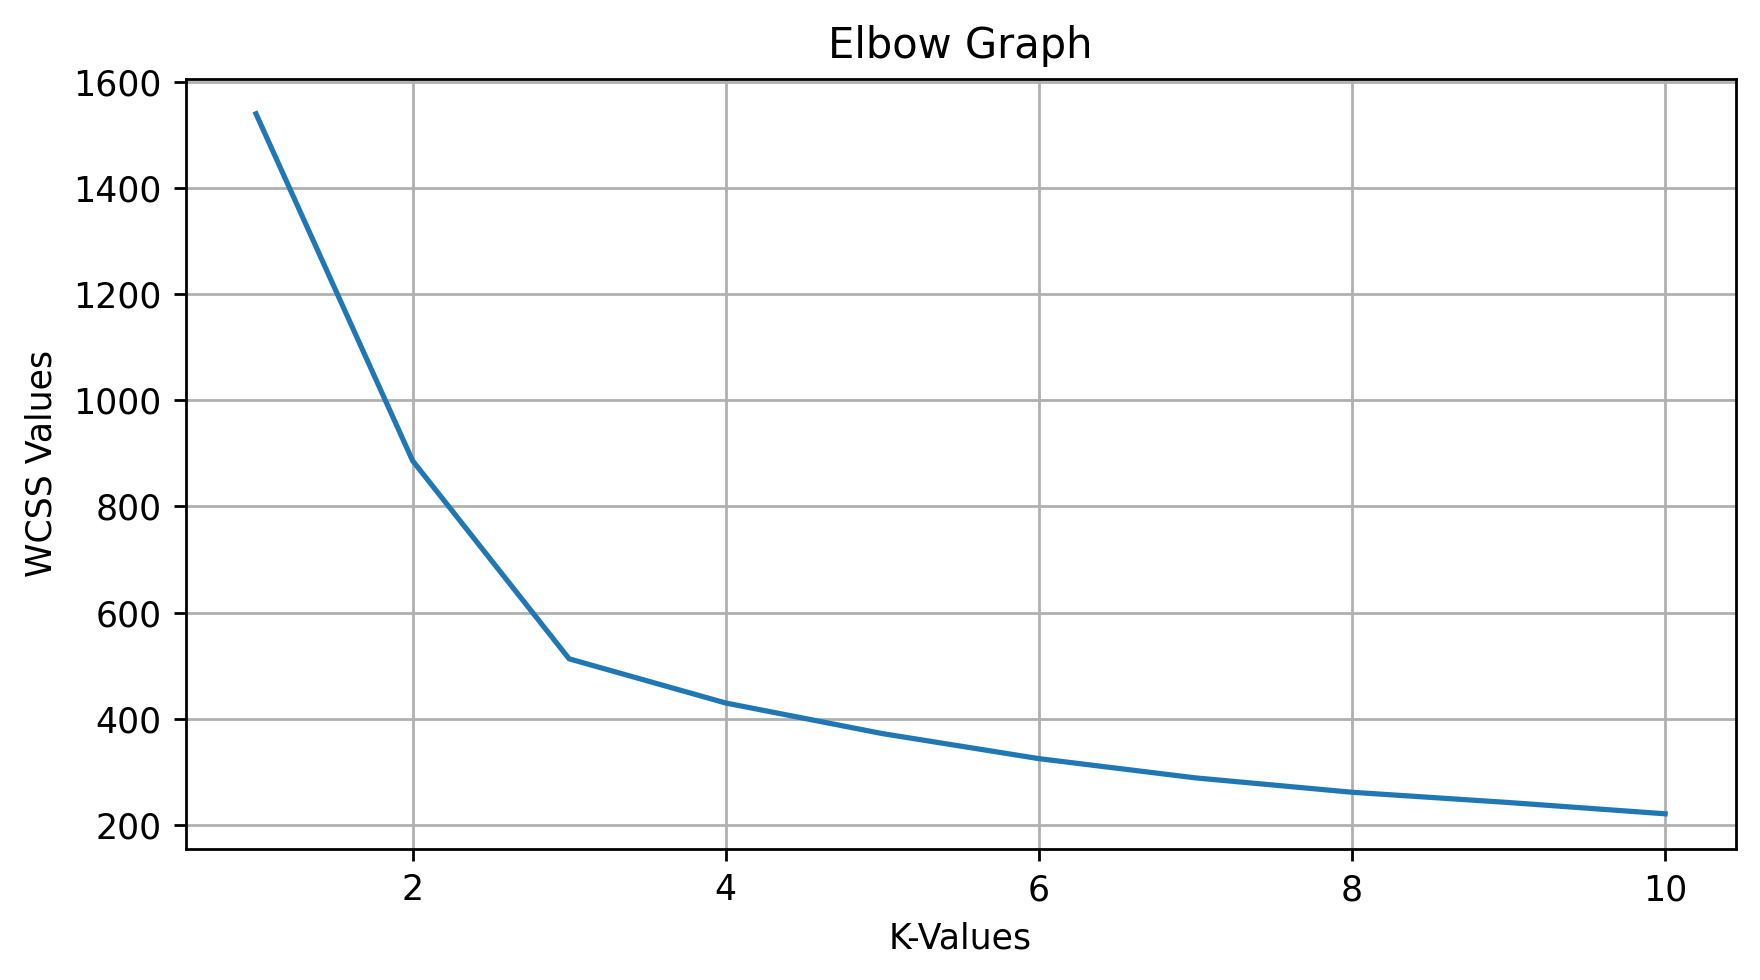

In [68]:
plt.plot(range(1,11), wcss)
plt.grid(True)
plt.xlabel('K-Values')
plt.ylabel('WCSS Values')
plt.title('Elbow Graph')

In [69]:
# Here i think 3 is the ideal no. clusters to be made.

Text(0.5, 1.0, 'Elbow Graph')

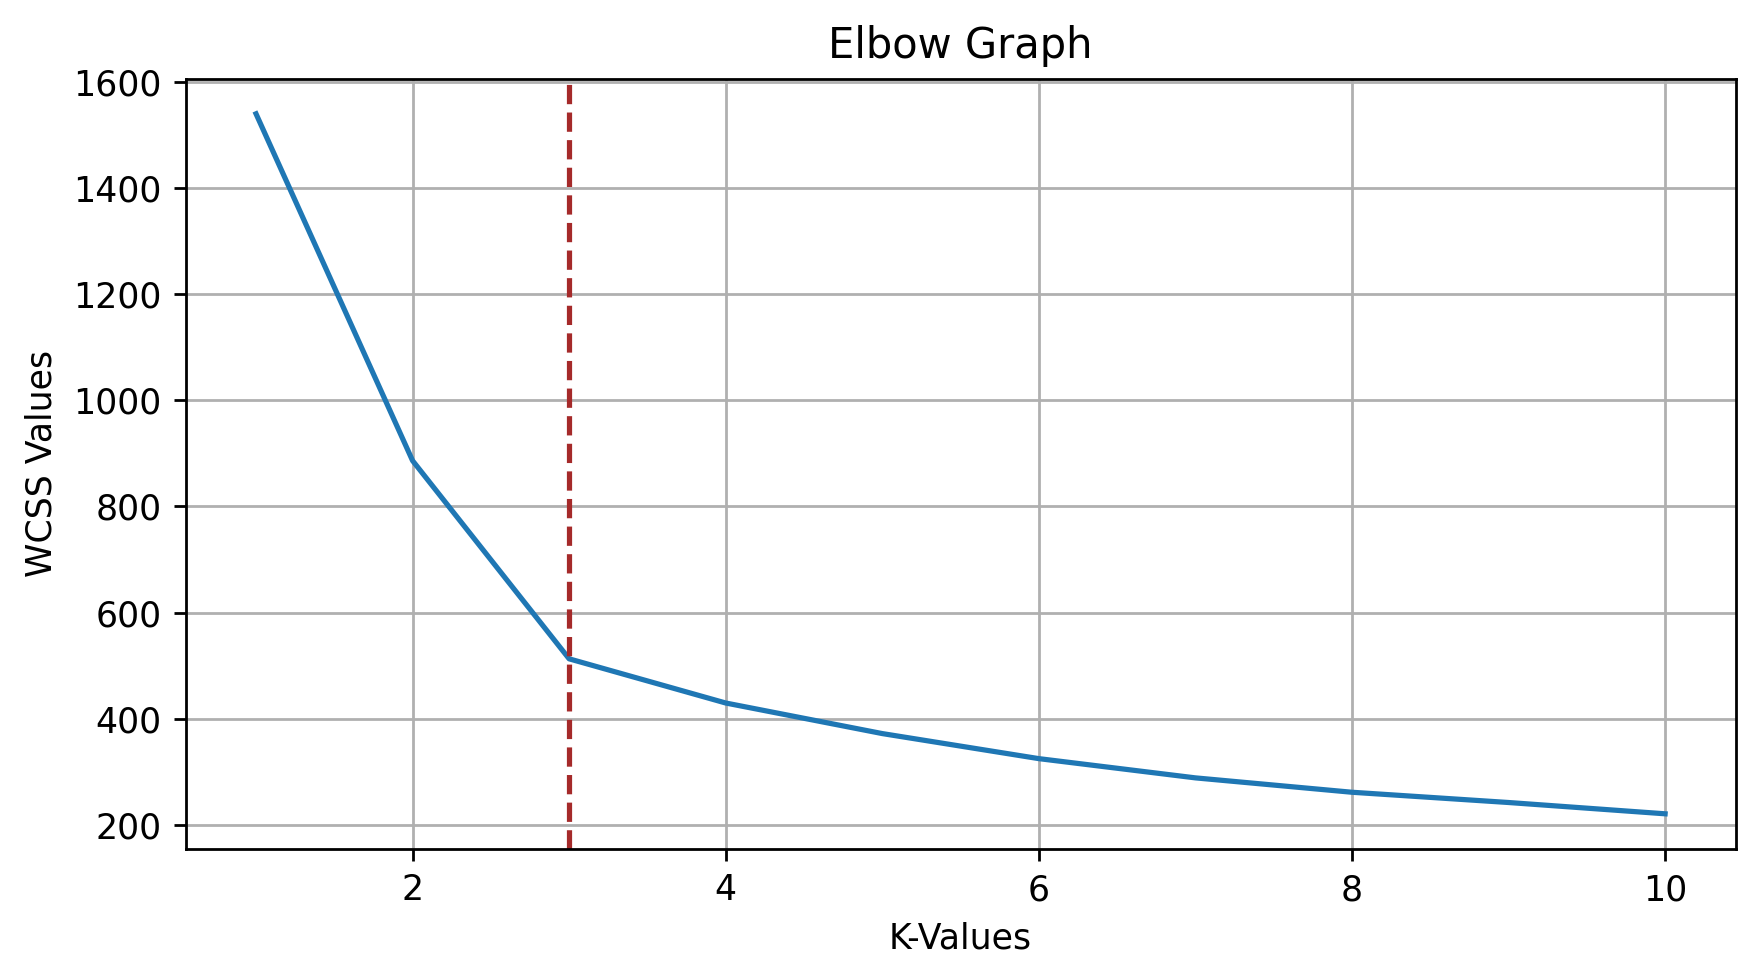

In [70]:
plt.plot(range(1,11), wcss)
plt.grid(True)
plt.axvline(x=3, linestyle = '--', color = 'brown')
plt.xlabel('K-Values')
plt.ylabel('WCSS Values')
plt.title('Elbow Graph')

In [71]:
# Final KMeans Model

In [72]:
km = KMeans(n_clusters=3)
ypred = km.fit_predict(x)
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [73]:
# Visualizing final model

In [74]:
km.cluster_centers_

array([[ 2.27619360e+00, -9.32054027e-01,  1.52803156e-03],
       [-3.69566084e-02,  1.77223945e+00,  1.86138728e-01],
       [-2.72003575e+00, -1.12565126e+00, -2.39093241e-01]])

Text(0.5, 1.0, 'Scatterplot Between Clusters & Centroids ')

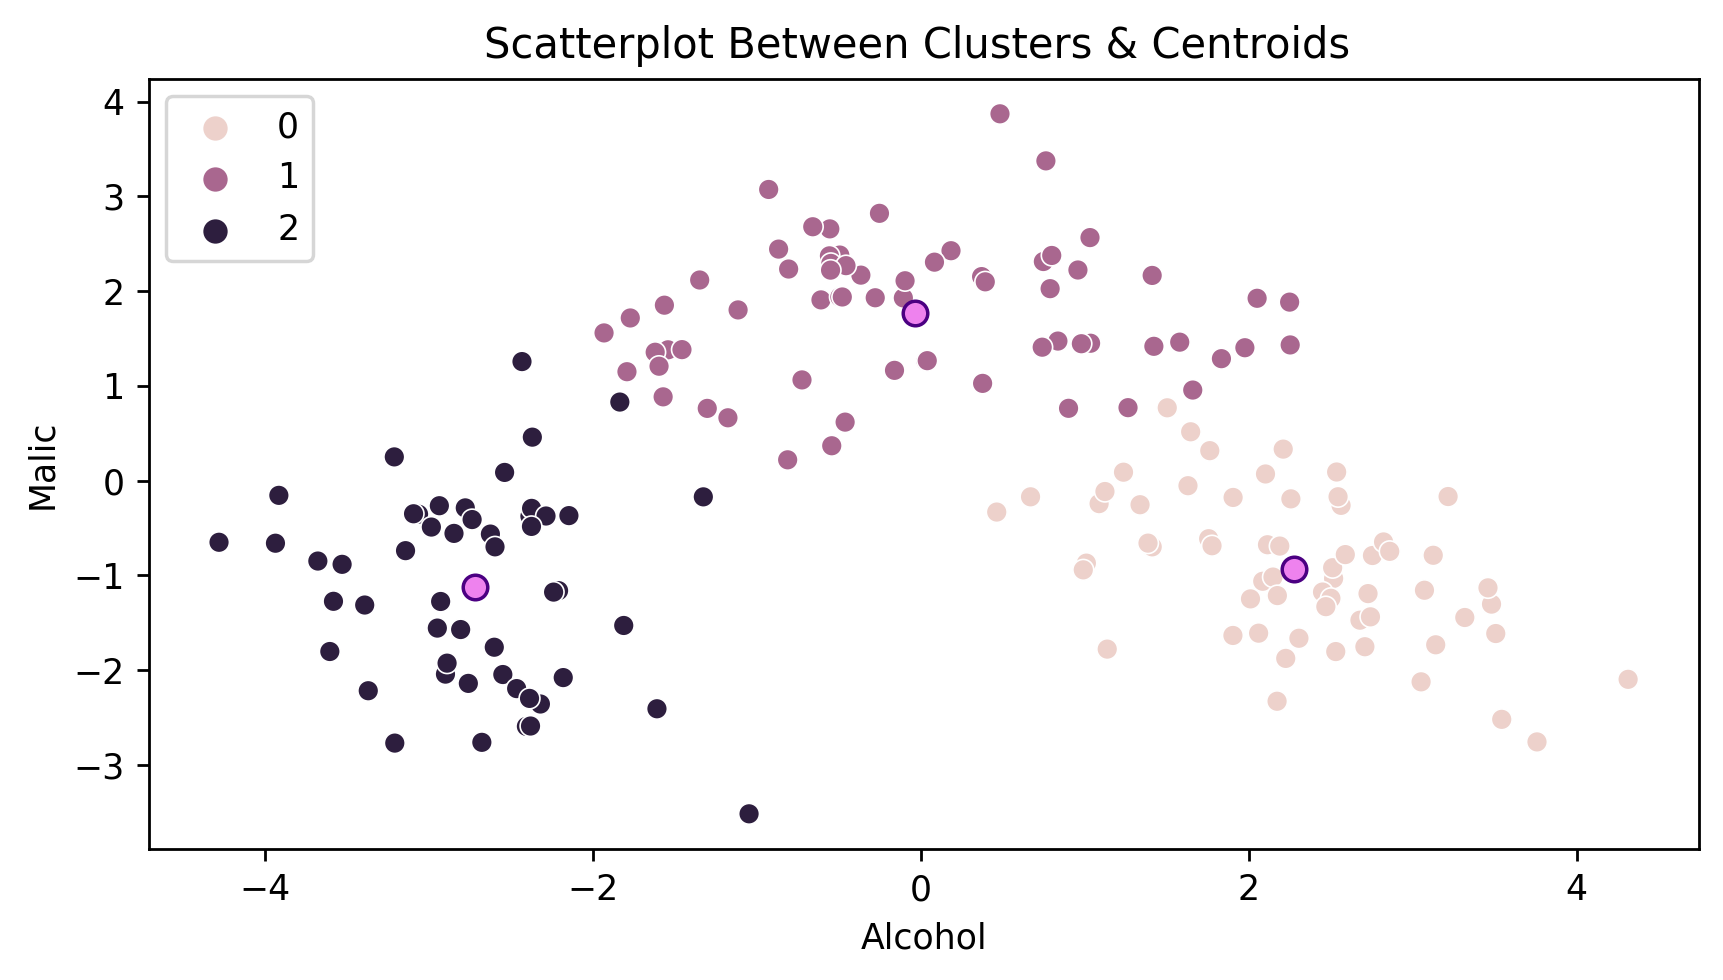

In [75]:
sns.scatterplot(x = data['Alcohol'], y = data['Malic'], hue = ypred)
plt.legend(loc='upper left')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='violet', s=50, edgecolor = 'indigo')
plt.title('Scatterplot Between Clusters & Centroids ')

Text(0.5, 1.0, 'Scatterplot Between Clusters & Centroids ')

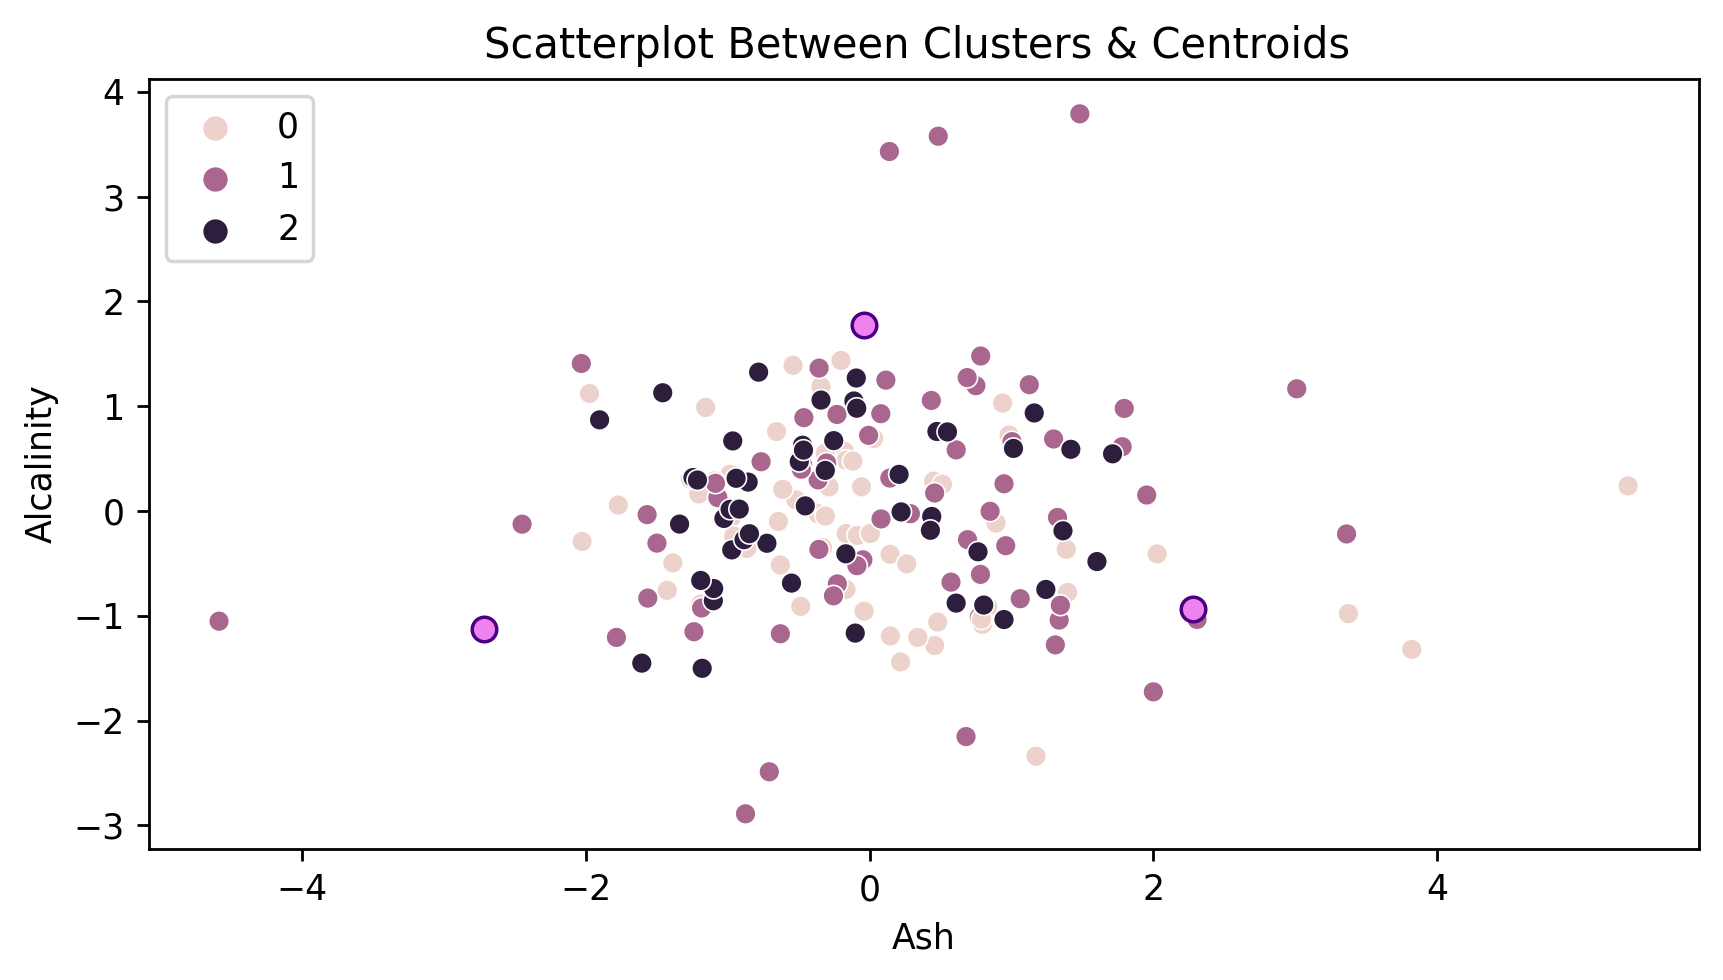

In [76]:
sns.scatterplot(x = data['Ash'], y = data['Alcalinity'], hue = ypred)
plt.legend(loc='upper left')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='violet', s=50, edgecolor = 'indigo')
plt.title('Scatterplot Between Clusters & Centroids ')

Text(0.5, 1.0, 'Scatterplot Between Clusters & Centroids ')

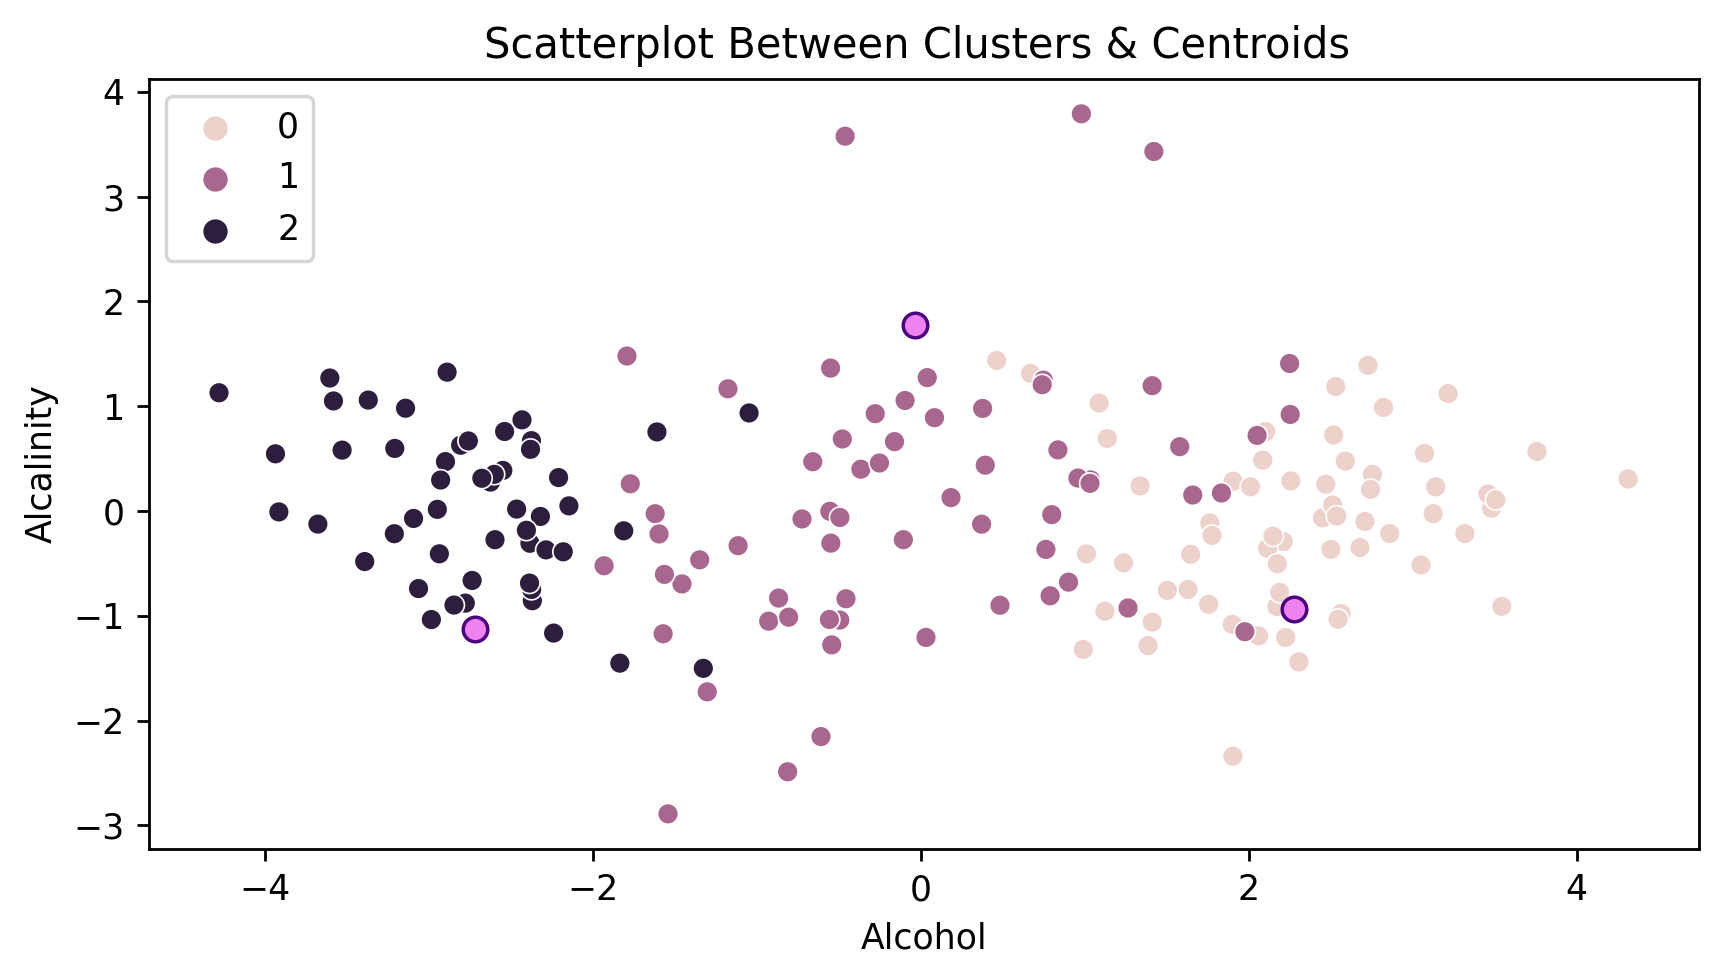

In [77]:
sns.scatterplot(x = data['Alcohol'], y = data['Alcalinity'], hue = ypred)
plt.legend(loc='upper left')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='violet', s=50, edgecolor = 'indigo')
plt.title('Scatterplot Between Clusters & Centroids ')

Text(0.5, 1.0, 'Scatterplot Between Clusters & Centroids ')

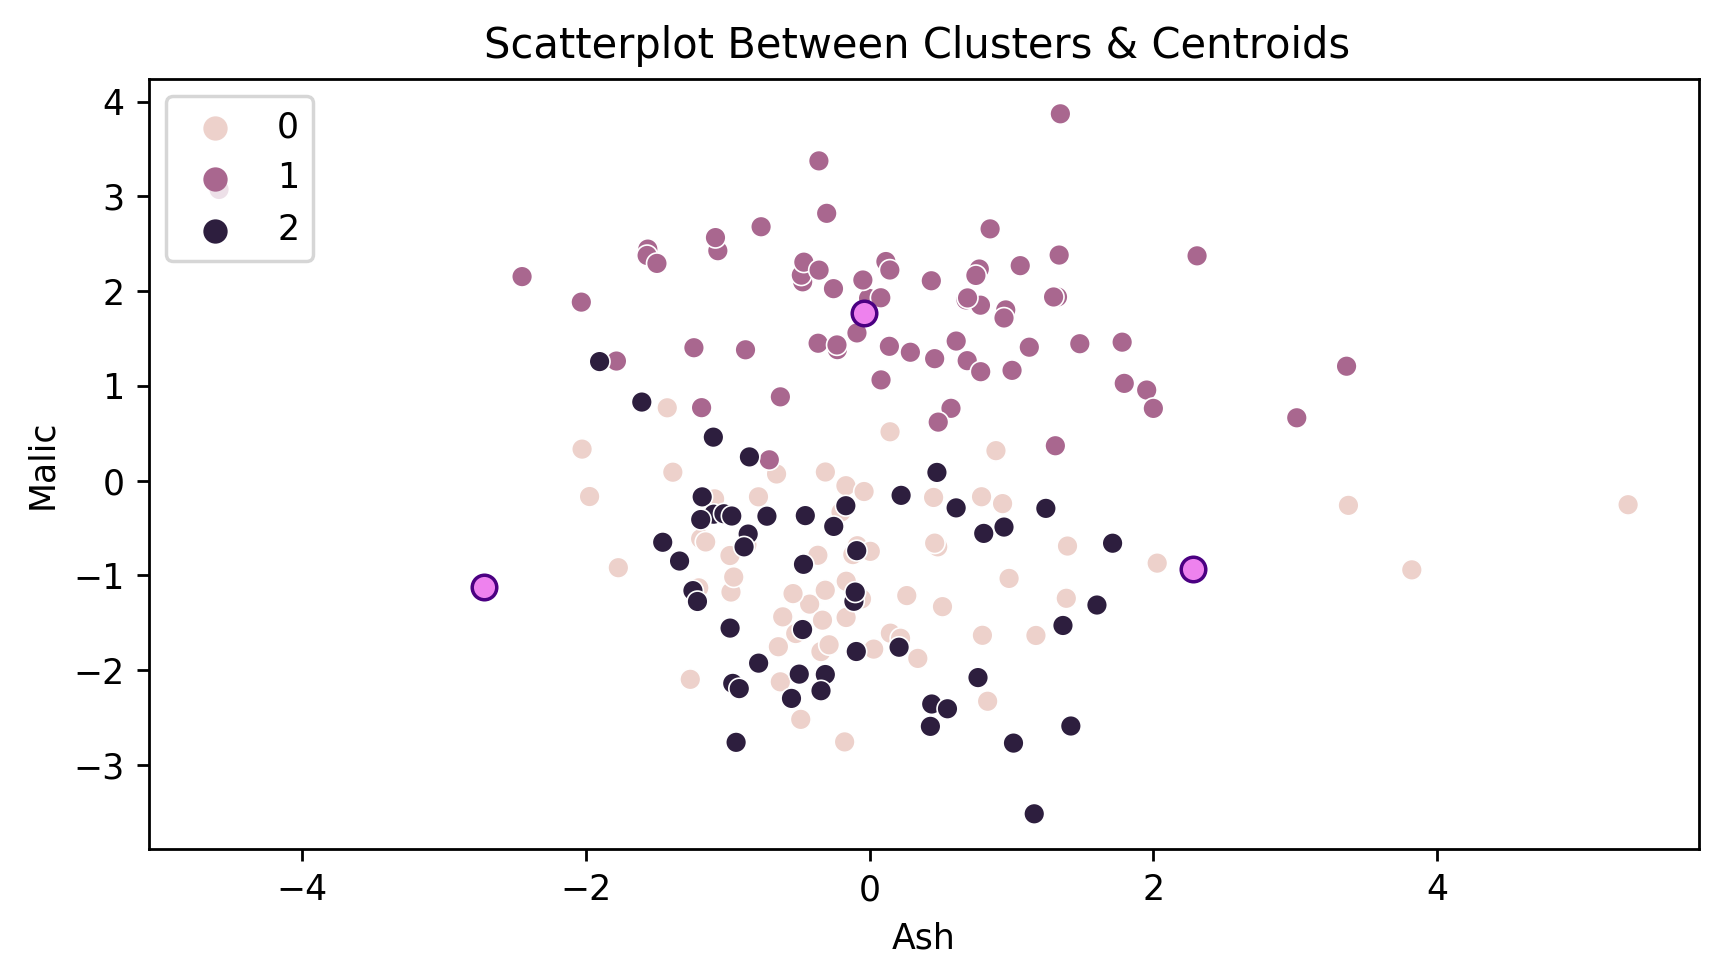

In [78]:
sns.scatterplot(x = data['Ash'], y = data['Malic'], hue = ypred)
plt.legend(loc='upper left')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='violet', s=50, edgecolor = 'indigo')
plt.title('Scatterplot Between Clusters & Centroids ')

In [79]:
# Now we can see the custers are formed correctly with accurate centroid locations.

In [80]:
# Final model evaluation

In [81]:
silhouette_score(x, ypred)

0.4537999848257617

In [82]:
# Sihhouette score is good(>0) and i think moderate silhouette score is dute to outliers

In [83]:
# Analyzing Clusters

In [84]:
data['Kmeans_clustrs'] = ypred
data

Alcohol     Malic       Ash  Alcalinity  Type  Hierar_Clustrs  \
0    3.316751 -1.443463 -0.165739   -0.215631     1               2   
1    2.209465  0.333393 -2.026457   -0.291358     1               2   
2    2.516740 -1.031151  0.982819    0.724902     1               2   
3    3.757066 -2.756372 -0.176192    0.567983     1               2   
4    1.008908 -0.869831  2.026688   -0.409766     1               2   
..        ...       ...       ...         ...   ...             ...   
173 -3.370524 -2.216289 -0.342570    1.058527     3               1   
174 -2.601956 -1.757229  0.207581    0.349496     3               1   
175 -2.677839 -2.760899 -0.940942    0.312035     3               1   
176 -2.387017 -2.297347 -0.550696   -0.688285     3               1   
177 -3.208758 -2.768920  1.013914    0.596903     3               1   

     Kmeans_clustrs  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
..              ...  
173               2  
174               2  
175               2  
176               2  
177               2  

[178 rows x 7 columns]

In [85]:
data[data['Kmeans_clustrs']==0]

Alcohol     Malic       Ash  Alcalinity  Type  Hierar_Clustrs  \
0    3.316751 -1.443463 -0.165739   -0.215631     1               2   
1    2.209465  0.333393 -2.026457   -0.291358     1               2   
2    2.516740 -1.031151  0.982819    0.724902     1               2   
3    3.757066 -2.756372 -0.176192    0.567983     1               2   
4    1.008908 -0.869831  2.026688   -0.409766     1               2   
..        ...       ...       ...         ...   ...             ...   
57   2.173741 -1.212200  0.261780   -0.504426     1               2   
58   3.139380 -1.731579 -0.285661    0.230567     1               2   
73   2.562227 -0.260199  3.374394   -0.979399     2               2   
95   2.543865 -0.169274  0.788697   -1.032837     2               2   
121  1.336322 -0.253337  5.345388    0.239038     2               2   

     Kmeans_clustrs  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
..              ...  
57                0  
58                0  
73                0  
95                0  
121               0  

[62 rows x 7 columns]

In [86]:
data[data['Kmeans_clustrs']==1]

Alcohol     Malic       Ash  Alcalinity  Type  Hierar_Clustrs  \
59  -0.928582  3.073486 -4.585064   -1.051844     2               0   
60  -1.542480  1.381444 -0.874683   -2.890120     2               0   
62   0.030607  1.262786 -1.784408   -1.206576     2               0   
63   2.050262  1.925033 -0.007369    0.721322     2               0   
64  -0.609681  1.908059  0.679358   -2.153076     2               0   
..        ...       ...       ...         ...   ...             ...   
125 -0.096810  2.109998  0.434826    1.054695     2               0   
126  0.038487  1.266762  0.687578    1.272884     2               0   
127 -1.597159  1.208144  3.361176   -0.219278     2               0   
128 -0.479565  1.938841  1.296508    0.686976     2               0   
129 -1.792833  1.150288  0.782800    1.478779     2               0   

     Kmeans_clustrs  
59                1  
60                1  
62                1  
63                1  
64                1  
..              ...  
125               1  
126               1  
127               1  
128               1  
129               1  

[65 rows x 7 columns]

In [87]:
data[data['Kmeans_clustrs']==2]

Alcohol     Malic       Ash  Alcalinity  Type  Hierar_Clustrs  \
61  -1.836250  0.829984 -1.605702   -1.452105     2               0   
83  -2.538977  0.087443  0.474251    0.758601     2               1   
118 -2.433013  1.257141 -1.903027    0.869732     2               0   
130 -1.327102 -0.170389 -1.180013   -1.501710     3               0   
131 -2.384501 -0.374583 -0.723823   -0.308195     3               1   
132 -2.936940 -0.263862 -0.167640   -0.408773     3               1   
133 -2.146811 -0.368255 -0.453301    0.048528     3               1   
134 -2.369869  0.459635 -1.101400   -0.856777     3               0   
135 -3.063842 -0.353413 -1.099124   -0.740398     3               1   
136 -3.915754 -0.154583  0.221828   -0.009068     3               1   
137 -3.936463 -0.659687  1.712215    0.545484     3               1   
138 -3.094276 -0.348843 -1.026831   -0.071349     3               1   
139 -2.374472 -0.291980  1.241914   -0.748806     3               1   
140 -2.778813 -0.286805  0.609670   -0.879347     3               1   
141 -2.286561 -0.372508 -0.971643   -0.371438     3               1   
142 -2.985633 -0.489218  0.946953   -1.036226     3               1   
143 -2.375195 -0.482334 -0.252884    0.671149     3               1   
144 -2.209866 -1.160053 -1.245125    0.318838     3               1   
145 -2.625621 -0.563161 -0.855961    0.275684     3               1   
146 -4.280639 -0.649671 -1.458197    1.128164     3               1   
147 -3.582641 -1.272703 -0.110784    1.049909     3               1   
148 -2.807064 -1.570534 -0.472528    0.627358     3               1   
149 -2.899659 -2.041057 -0.495960    0.471156     3               1   
150 -2.320737 -2.356366  0.437682   -0.052260     3               1   
151 -2.549831 -2.045283 -0.312268    0.386972     3               1   
152 -1.812541 -1.527646  1.362590   -0.189396     3               1   
153 -2.760145 -2.138932 -0.964629    0.668386     3               1   
154 -2.737151 -0.409886 -1.190405   -0.663045     3               1   
155 -3.604869 -1.802384 -0.094037    1.268840     3               1   
156 -2.889826 -1.925219 -0.782323    1.324725     3               1   
157 -3.392156 -1.311876  1.602026   -0.482842     3               1   
158 -1.048182 -3.515090  1.160039    0.935329     3               1   
159 -1.609912 -2.406638  0.548560    0.754310     3               1   
160 -3.143131 -0.738161 -0.090999    0.980648     3               1   
161 -2.240157 -1.175465 -0.101377   -1.165279     3               1   
162 -2.847674 -0.556044  0.804215   -0.897888     3               1   
163 -2.597497 -0.697966 -0.884940   -0.274229     3               1   
164 -2.949299 -1.555309 -0.983401    0.015480     3               1   
165 -3.530032 -0.882527 -0.466029    0.580790     3               1   
166 -2.406111 -2.592356  0.428226   -0.184335     3               1   
167 -2.929085 -1.274447 -1.213358    0.295316     3               1   
168 -2.181413 -2.077537  0.763783   -0.389593     3               1   
169 -2.380928 -2.588667  1.418044    0.588502     3               1   
170 -3.211617  0.251249 -0.847129   -0.217065     3               1   
171 -3.677919 -0.847748 -1.339420   -0.125176     3               1   
172 -2.465556 -2.193798 -0.918781    0.018025     3               1   
173 -3.370524 -2.216289 -0.342570    1.058527     3               1   
174 -2.601956 -1.757229  0.207581    0.349496     3               1   
175 -2.677839 -2.760899 -0.940942    0.312035     3               1   
176 -2.387017 -2.297347 -0.550696   -0.688285     3               1   
177 -3.208758 -2.768920  1.013914    0.596903     3               1   

     Kmeans_clustrs  
61                2  
83                2  
118               2  
130               2  
131               2  
132               2  
133               2  
134               2  
135               2  
136               2  
137               2  
138               2  
139               2  
140  

In [88]:
data.groupby('Kmeans_clustrs').agg('mean')

Alcohol     Malic       Ash  Alcalinity      Type  \
Kmeans_clustrs                                                       
0               2.276194 -0.932054  0.001528   -0.135498  1.048387   
1              -0.036957  1.772239  0.186139    0.080240  2.000000   
2              -2.720036 -1.125651 -0.239093    0.062457  2.941176   

                Hierar_Clustrs  
Kmeans_clustrs                  
0                     2.000000  
1                     0.092308  
2                     0.921569

In [89]:
# Here we can see 
# Wines which are having very high alcalinity are clustered together in cluster no. 0
# Wines which are having moderate alcalinity are clustered together in cluster no. 1
# Wines which are having very less alcalinity are clustered together in cluster no. 2 (which is as same as Hierarchical Clusters)

In [90]:
data['Kmeans_clustrs'].value_counts()

1    65
0    62
2    51
Name: Kmeans_clustrs, dtype: int64

In [91]:
data['Hierar_Clustrs'].value_counts()

0    66
2    65
1    47
Name: Hierar_Clustrs, dtype: int64

In [92]:
data['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [93]:
# Here we can see that after clustering also we have obtained same number of clusters with the original data

In [94]:
# As per the probem statement we have performed PCA, Hierarcical Clustering, Kmeans Clustering and checked whether we have 
# obtained same no. of clusters with the original data